1. Use the np.log() function to log the values of RGDP per capita. Create a lag for this new variable and rerun the regression using these new logged values as well as untransformed Economic Freedom Index Values (don't log these variables!). (hint: you may reimport the csv file).

2. Plot the residuals in a bar chart. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.

3. Plot a scatter plot with RGDP Per Capita on the horizontal axis and the predictor on the vertical axis. Then plot a scatter plot with RGDP Per Capita on the horizontal axis and the residual on the vertical axis. Are the residuals normally distributed? Why or why not? Why does this matter?

4. Plot the observed and predicted logged values of RGDP Per Capita for each individual country.

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = [0,1], 
                   parse_dates = True)
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product(
    [countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)

data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1623.0  
         2013-01-01           1801.0  
         2014-01-01           1797.0  
         2015-01-01           1759.0  

[7452 rows x 7 columns]

In [2]:
data["RGDP Per Capita Logged"] = np.log(data["RGDP Per Capita"])
data = data.dropna(axis=0)

In [3]:
data["RGDP Per Capita Logged Lag"] = data.groupby("ISO_Code")["RGDP Per Capita Logged"].shift()

<ipython-input-3-31dd58f72fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["RGDP Per Capita Logged Lag"] = data.groupby("ISO_Code")["RGDP Per Capita Logged"].shift()


In [4]:
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      2005-01-01  4.002282            4.652865   
         2006-01-01  4.883132            5.342913   
         2007-01-01  4.980365            5.239228   
         2008-01-01  4.980803            5.307379   
         2009-01-01  5.357889            7.104953   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Logged  \
ISO_Code Year                                                  
AGO      2005-01-01           3364.0                8.120886   
         2006-01-01           4558.0                8.424639   
         2007-01-01           5314.0                8.578100   
         2008-01-01           6318.0                8.751158   
         2009-01-01           5212.0                8.558719   
...                              ...                     ...   
ZWE      2011-01-01           1515.0                7.323171   
         2012-01-01           1623.0                7.392032   
         2013-01-01           1801.0                7.496097   
         2014-01-01           1797.0                7.493874   
         2015-01-01           1759.0                7.472501   

                     RGDP Per Capita Logged Lag  
ISO_Code Year                                    
AGO      2005-01-01                         NaN  
         2006-01-01                    8.120886  
         2007-01-01                    8.424639  
         2008-01-01                    8.578100  
         2009-01-01                    8.751158  
...                                         ...  
ZWE      2011-01-01                    7.261927  
         2012-01-01                    7.323171  
         2013-01-01                    7.392032  
         2014-01-01                    7.496097  
         2015-01-01                    7.493874  

[2579 rows x 9 columns]

In [5]:
y_var = ["RGDP Per Capita Logged"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

RGDP Per Capita Logged  Size of Government  \
RGDP Per Capita Logged                              1.00               -0.14   
Size of Government                                 -0.14                1.00   
Legal System & Property Rights                      0.75               -0.10   
Sound Money                                         0.51                0.20   
Freedom to trade internationally                    0.59                0.24   
Regulation                                          0.52                0.21   

                                  Legal System & Property Rights  Sound Money  \
RGDP Per Capita Logged                                      0.75         0.51   
Size of Government                                         -0.10         0.20   
Legal System & Property Rights                              1.00         0.52   
Sound Money                                                 0.52         1.00   
Freedom to trade internationally                            0.63         0.68   
Regulation                                                  0.59         0.60   

                                  Freedom to trade internationally  Regulation  
RGDP Per Capita Logged                                        0.59        0.52  
Size of Government                                            0.24        0.21  
Legal System & Property Rights                                0.63        0.59  
Sound Money                                                   0.68        0.60  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [6]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [26]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data["Residuals"] = results.resid

In [27]:
reg_data

RGDP Per Capita Logged  Size of Government  \
ISO_Code Year                                                     
AGO      2005-01-01                8.120886            4.652865   
         2006-01-01                8.424639            5.342913   
         2007-01-01                8.578100            5.239228   
         2008-01-01                8.751158            5.307379   
         2009-01-01                8.558719            7.104953   
...                                     ...                 ...   
ZWE      2011-01-01                7.323171            6.424630   
         2012-01-01                7.392032            6.670469   
         2013-01-01                7.496097            6.325105   
         2014-01-01                7.493874            6.433165   
         2015-01-01                7.472501            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Logged Predictor  Residuals  \
ISO_Code Year                                                      
AGO      2005-01-01                          7.915293   0.205593   
         2006-01-01                          8.169066   0.255573   
         2007-01-01                          8.229393   0.348707   
         2008-01-01                          8.205792   0.545366   
         2009-01-01                          7.913733   0.644986   
...                                               ...        ...   
ZWE      2011-01-01                          7.953901  -0.630730   
         2012-01-01                          7.949807  -0.557775   
         2013-01-01                          8.043031  -0.546934   
         2014-01-01                          8.174263  -0.680389   
         2015-01-01                          8.392839  -0.920338   

                     Squared Residuals  
ISO_Code Year                           
AGO      2005-01-01           0.042268  
         2006-01-01           0.065318  
         2007-01-01           0.121597  
         2008-01-01           0.297425  
         2009-01-01           0.416007  
...                                ...  
ZWE      2011-01-01           0.397820  
         2012-01-01           0.311113  
         2013-01-01           0.299136  
         2014-01-01           

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     RGDP Per Capita Logged   R-squared:                       0.609
Model:                                OLS   Adj. R-squared:                  0.608
Method:                     Least Squares   F-statistic:                     800.9
Date:                    Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                            18:52:59   Log-Likelihood:                -2941.7
No. Observations:                    2579   AIC:                             5895.
Df Residuals:                        2573   BIC:                             5931.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.1681      0.014    -12.437      0.000      -0.195      -0.142
Legal System & Property Rights       0.3572      0.013     28.294      0.000       0.332       0.382
Sound Money                          0.0722      0.012      6.265      0.000       0.050       0.095
Freedom to trade internationally     0.1544      0.016      9.685      0.000       0.123       0.186
Regulation                           0.0604      0.018      3.267      0.001       0.024       0.097
Constant                             6.2357      0.106     58.828      0.000       6.028       6.444
==============================================================================
Omnibus:                       43.602   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.372
Skew:                          -0.175   Prob(JB):                     6.38e-15
Kurtosis:                       3.697   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the residuals in a bar chart. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

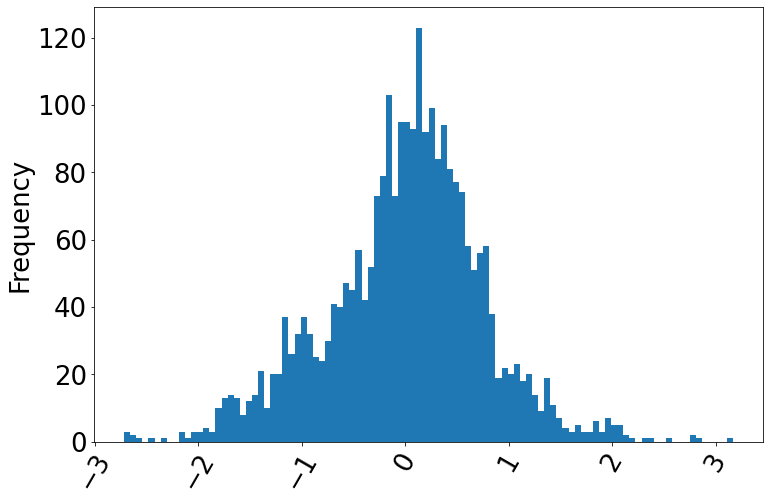

In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
results.resid.plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)


<AxesSubplot:ylabel='Frequency'>

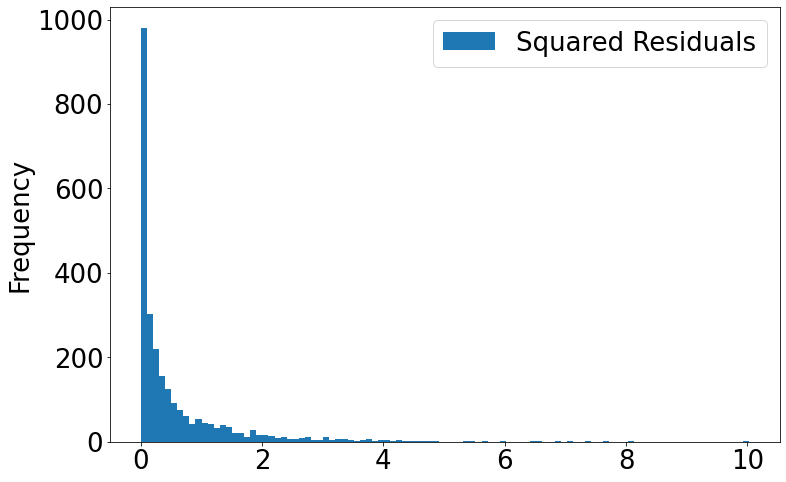

In [21]:
reg_data["Squared Residuals"] = results.resid.pow(2)
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

# The residuals distribution is now a density function thatr resembles a standard normal distribution : X ~ N(0,1)
previously, our residual plot had a much larger SD and the OLS coefficients were not normalized to be close to 1.

### Plot a scatter plot with RGDP Per Capita on the horizontal axis and the predictor on the vertical axis. Then plot a scatter plot with RGDP Per Capita on the horizontal axis and the residual on the vertical axis. Are the residuals normally distributed? Why or why not? Why does this matter?

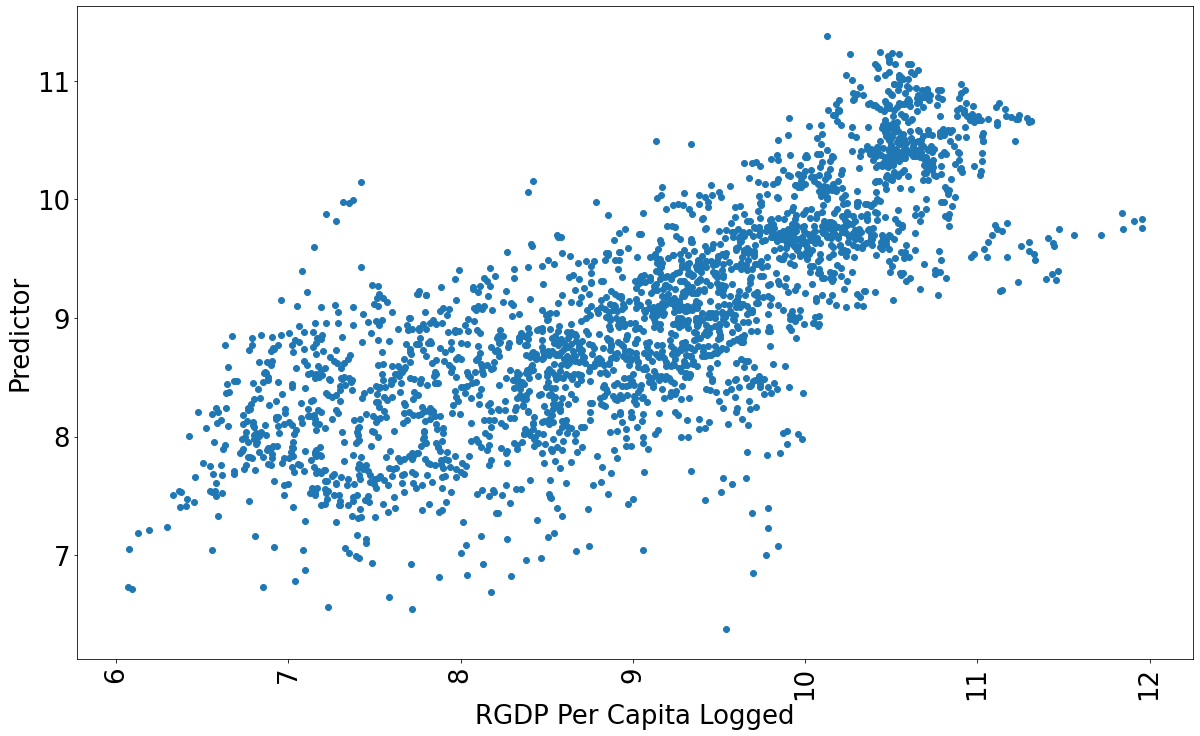

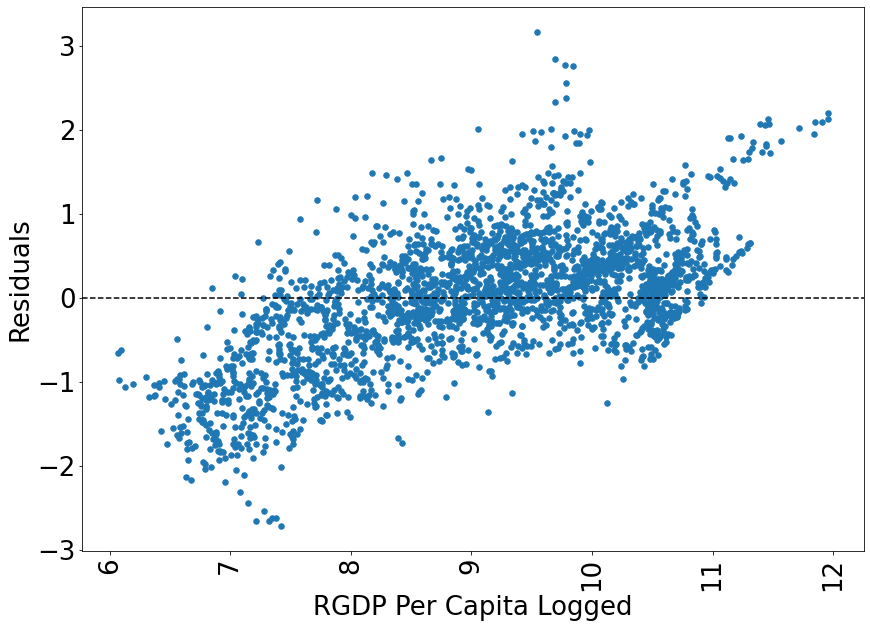

In [29]:
fig, ax = plt.subplots(figsize = (20, 12))
plt.scatter(reg_data["RGDP Per Capita Logged"], predictor)
plt.xticks(rotation=90)
plt.xlabel("RGDP Per Capita Logged")
plt.ylabel("Predictor")
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

One would expect a linear correltion for the residuals of these variables if they were normally distributed, which these graphs roughly are. 

We can move forward with the assumption that the residuals are normally distributed because the residual scatter plots convey a -roughly- normal distribution

### Plot the observed and predicted logged values of RGDP Per Capita for each individual country.

In [34]:
countries = reg_data.groupby("ISO_Code").mean().index
plot_data = reg_data[y_var + ["RGDP Per Capita Logged Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data.head()

<ipython-input-34-06678fbf71d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita Logged  RGDP Per Capita Logged Predictor
ISO_Code Year                                                                
AGO      2005-01-01                9.120886                          8.915293
         2006-01-01                9.424639                          9.169066
         2007-01-01                9.578100                          9.229393
         2008-01-01                9.751158                          9.205792
         2009-01-01                9.558719                          8.913733

<ipython-input-36-ee70bd4bc955>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


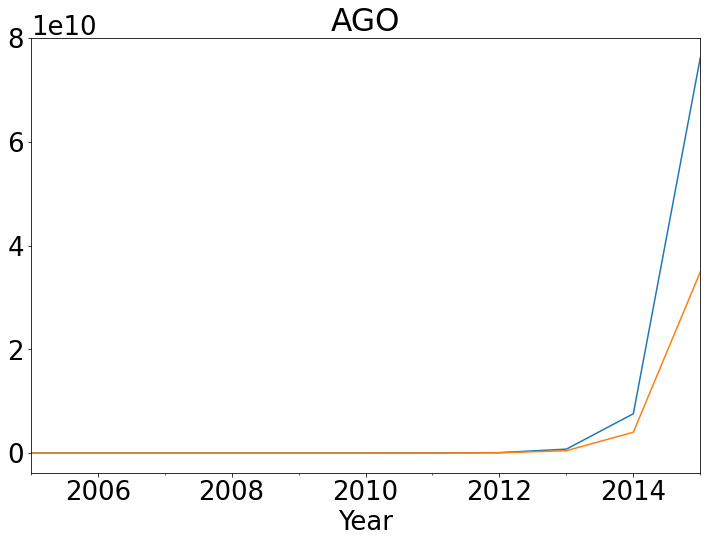

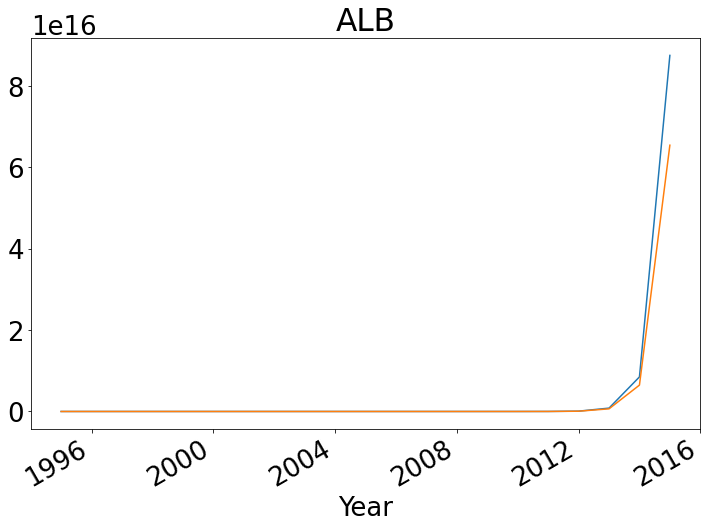

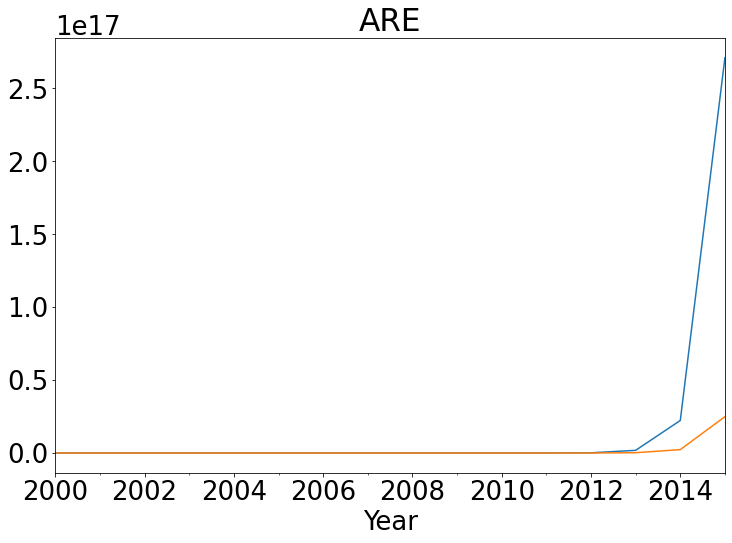

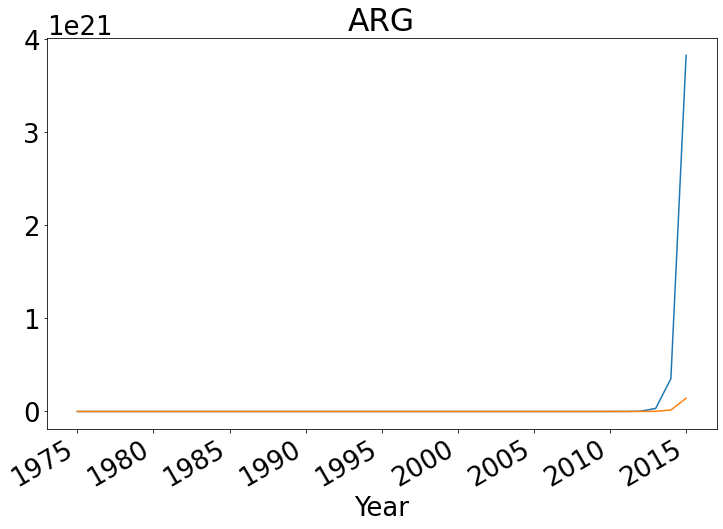

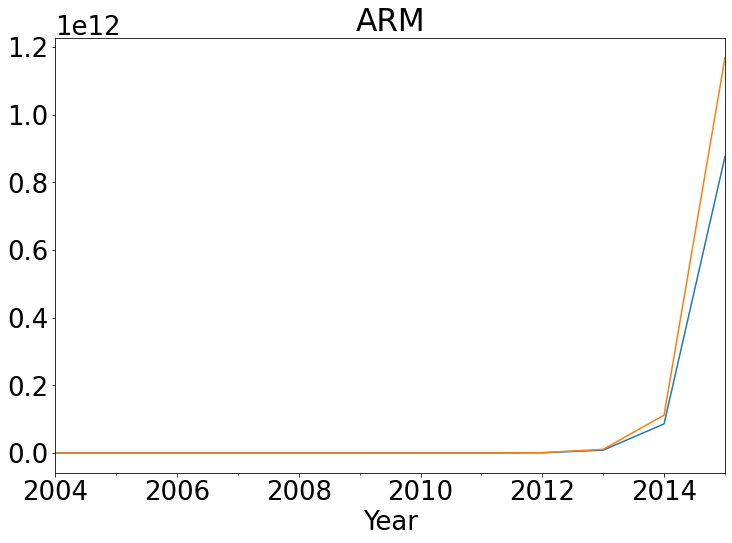

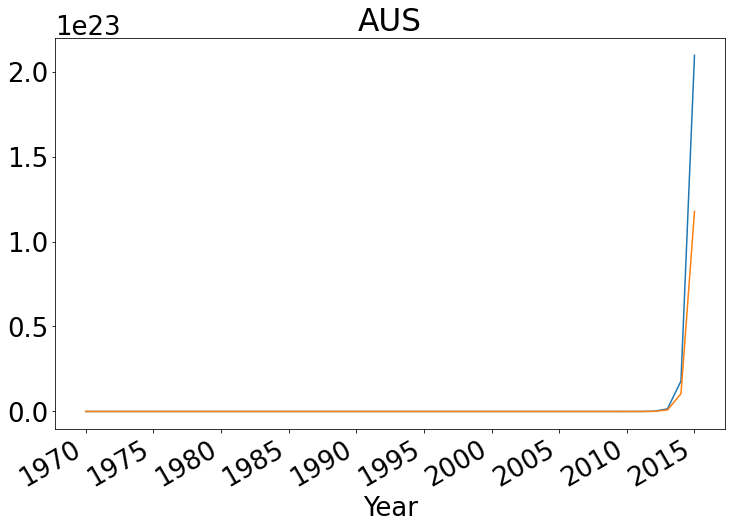

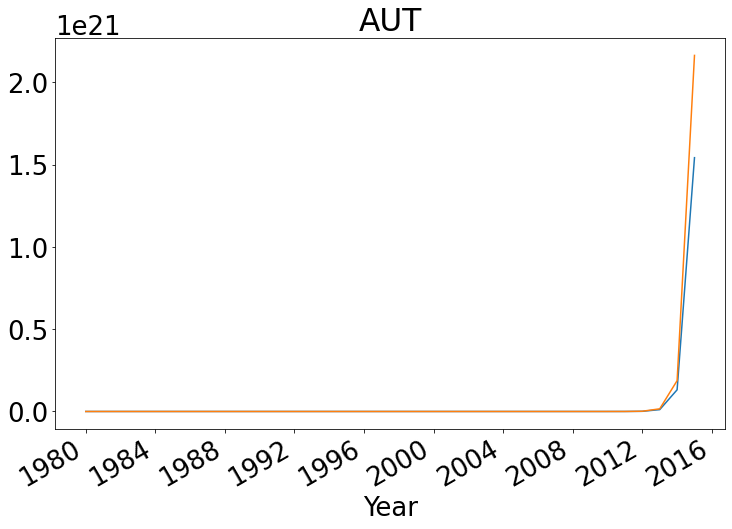

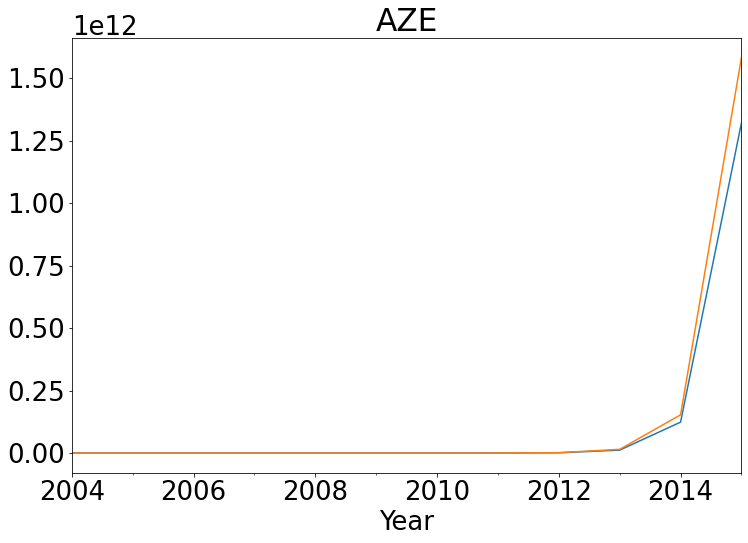

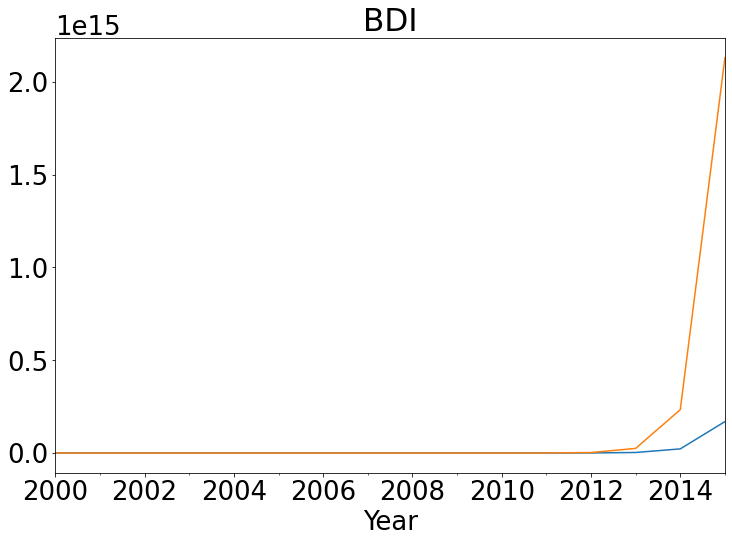

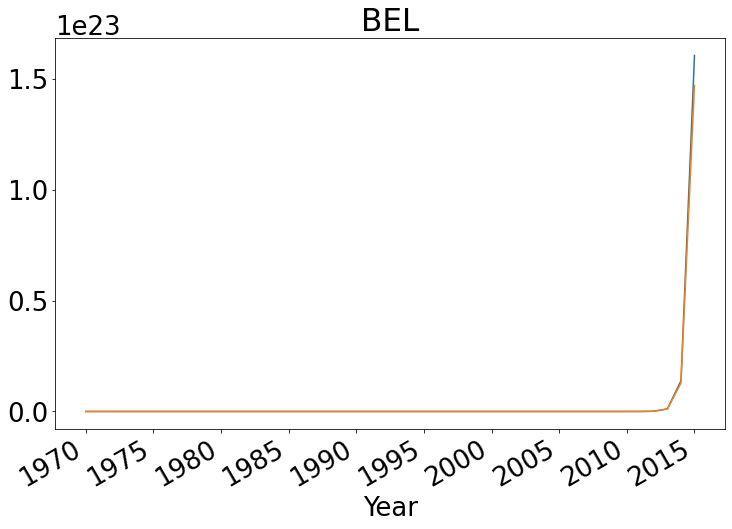

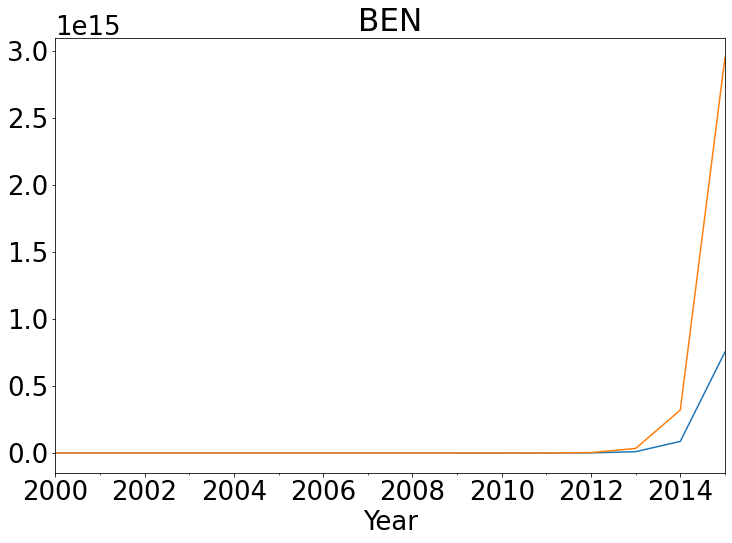

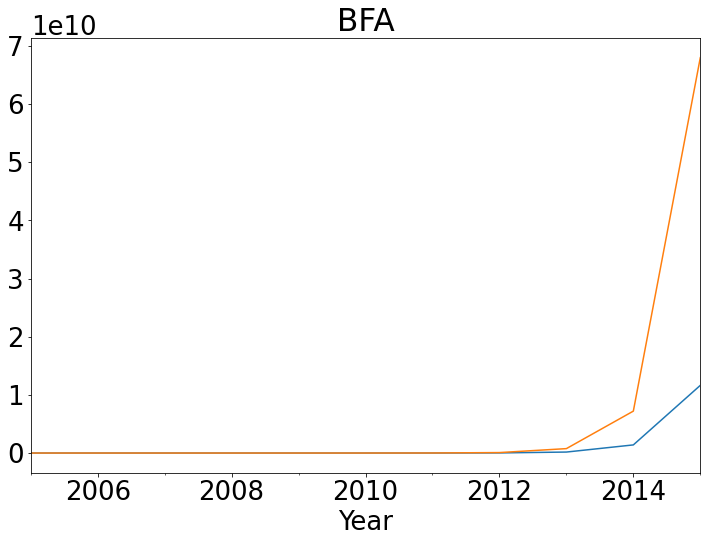

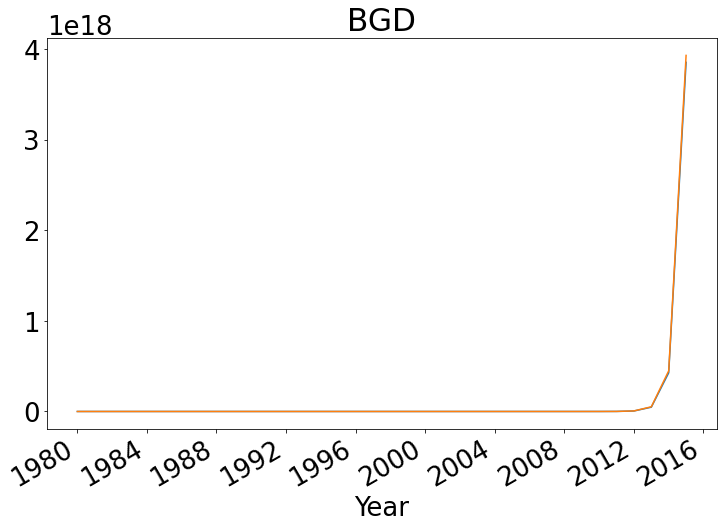

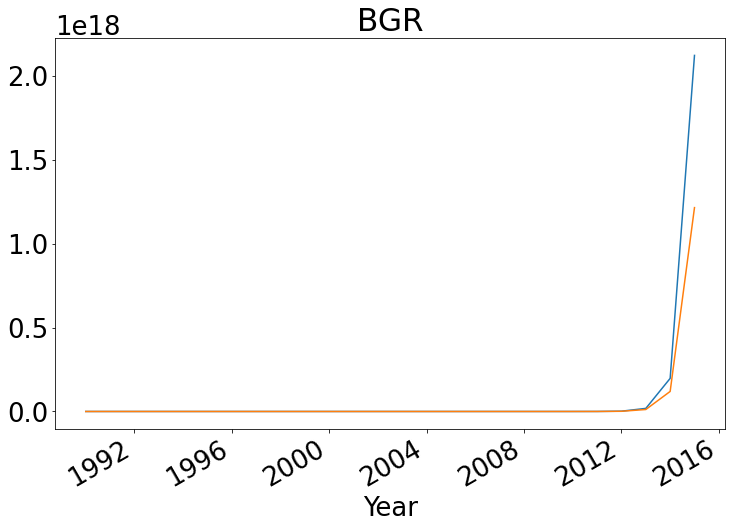

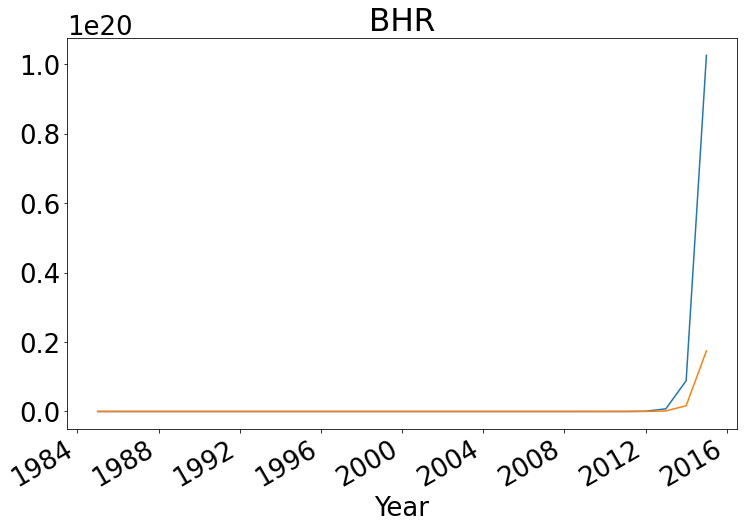

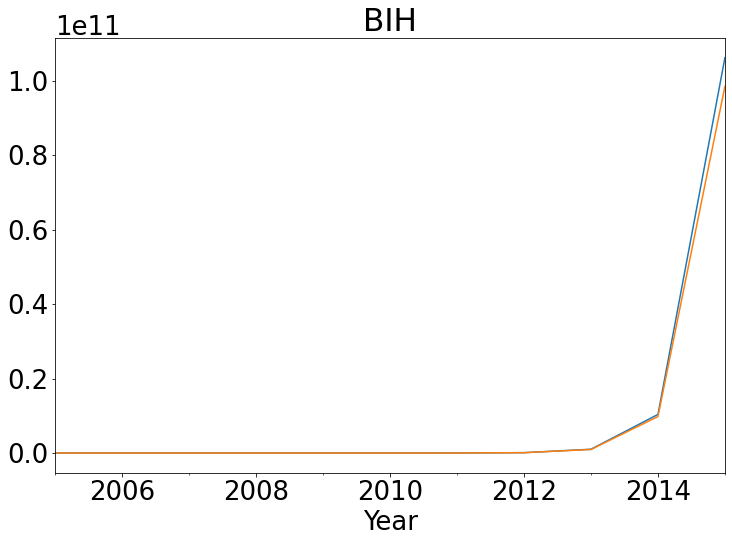

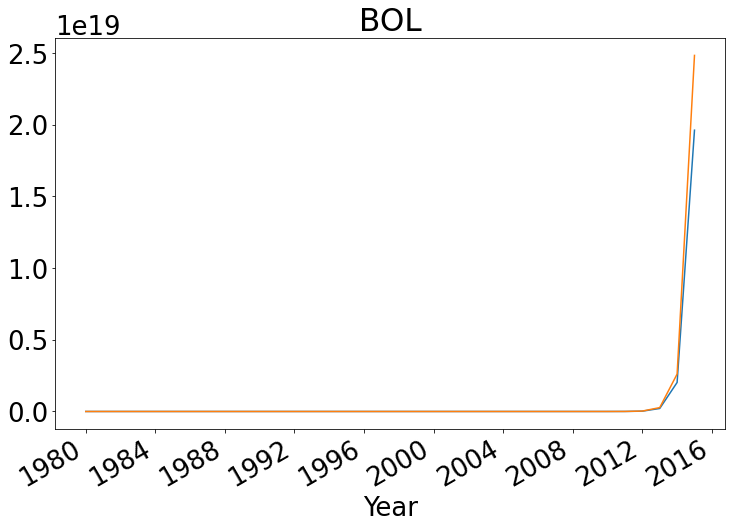

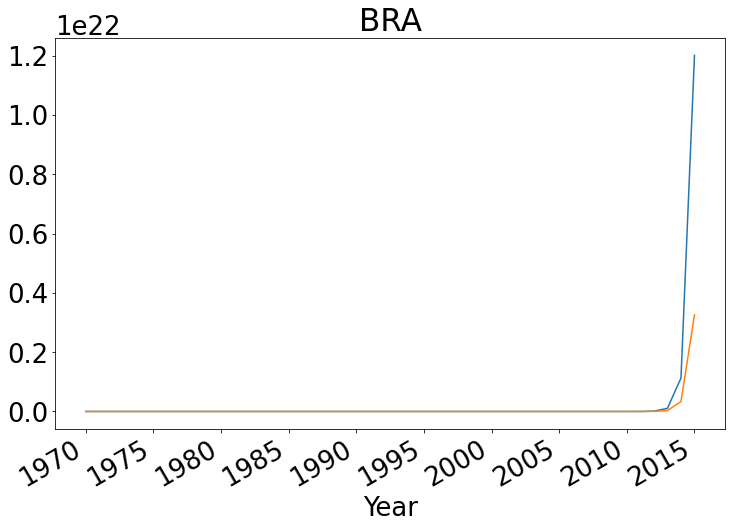

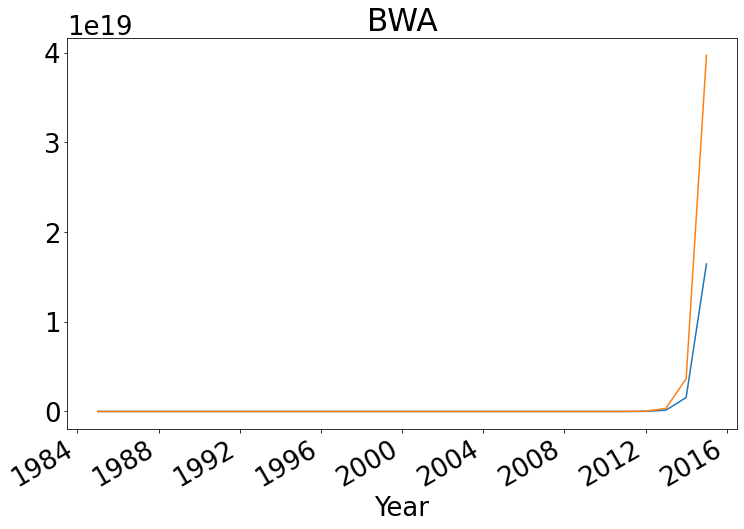

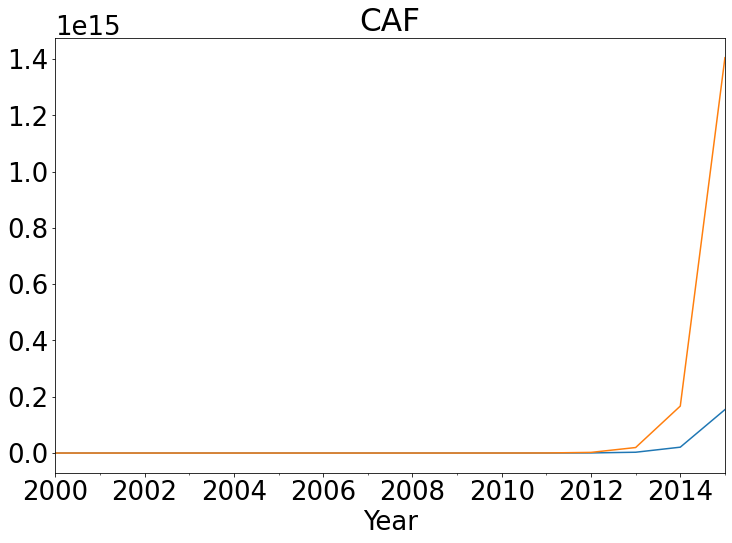

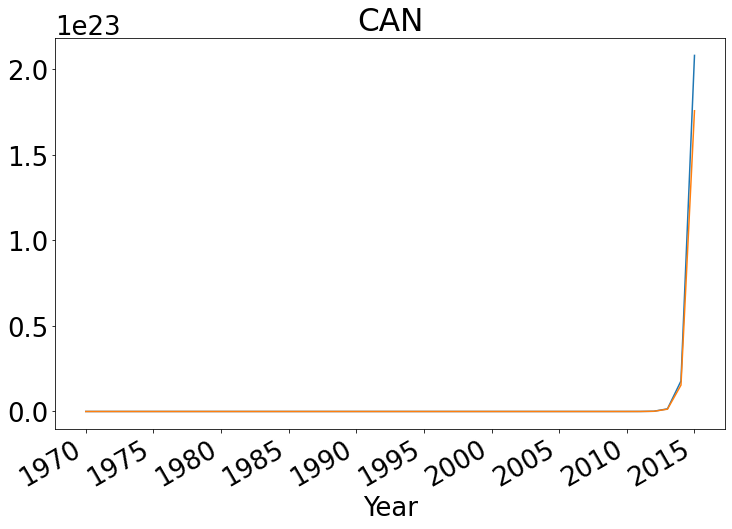

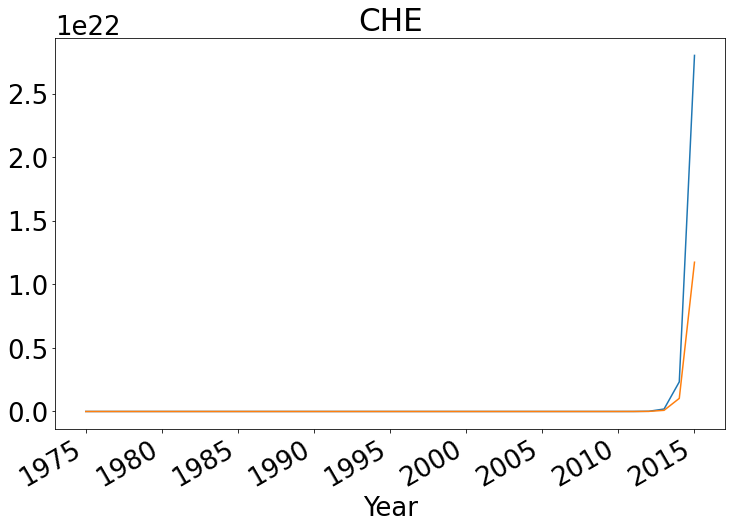

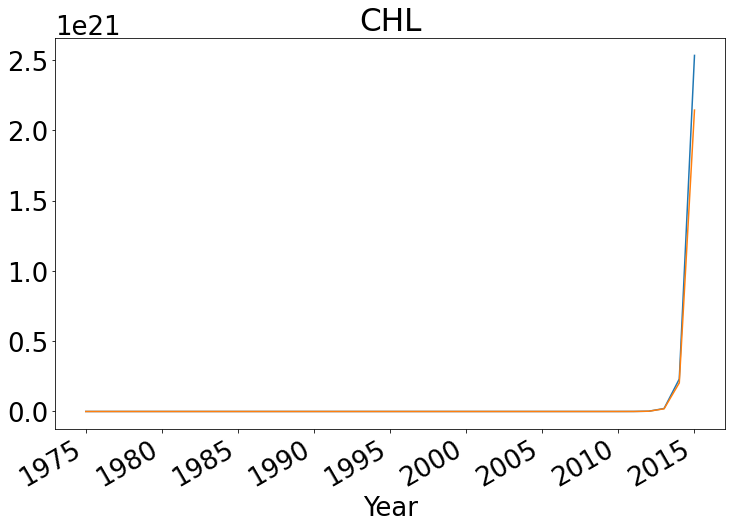

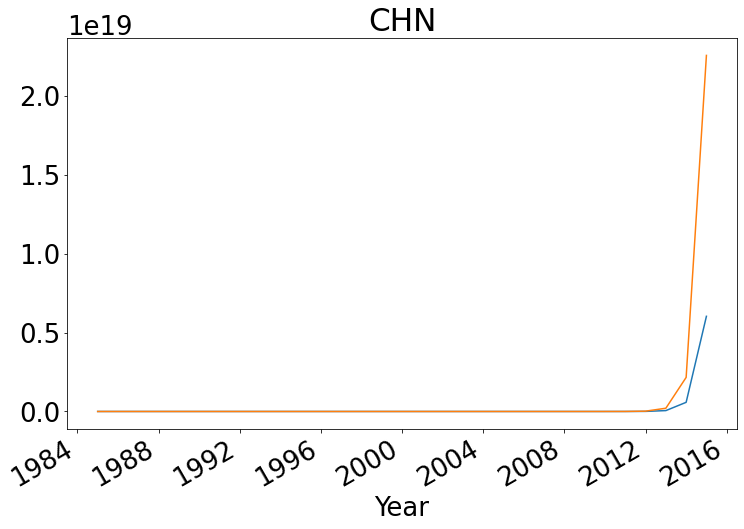

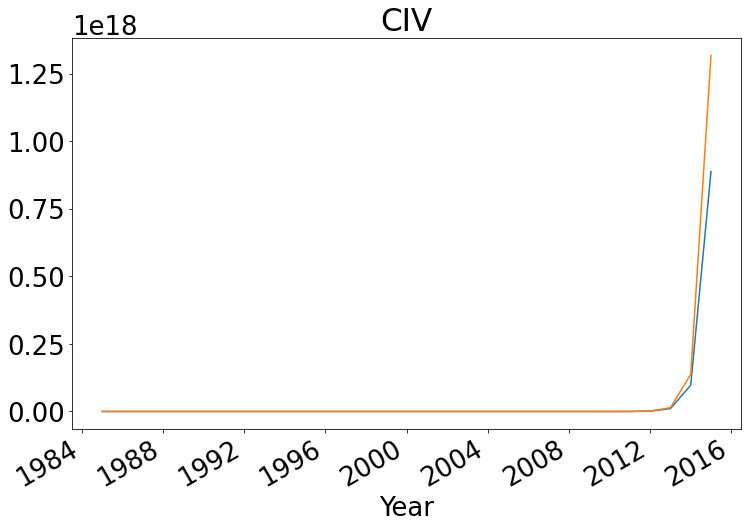

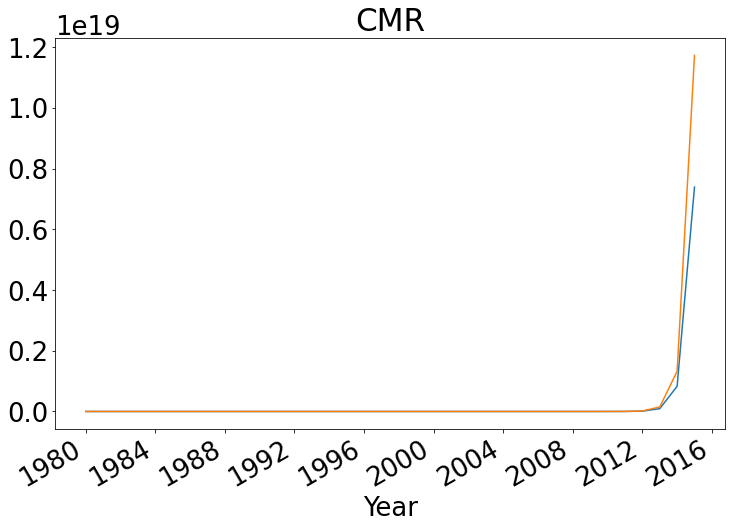

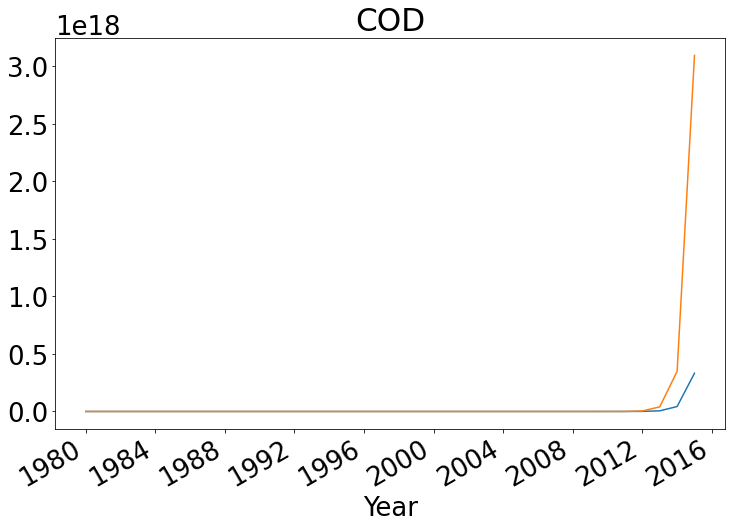

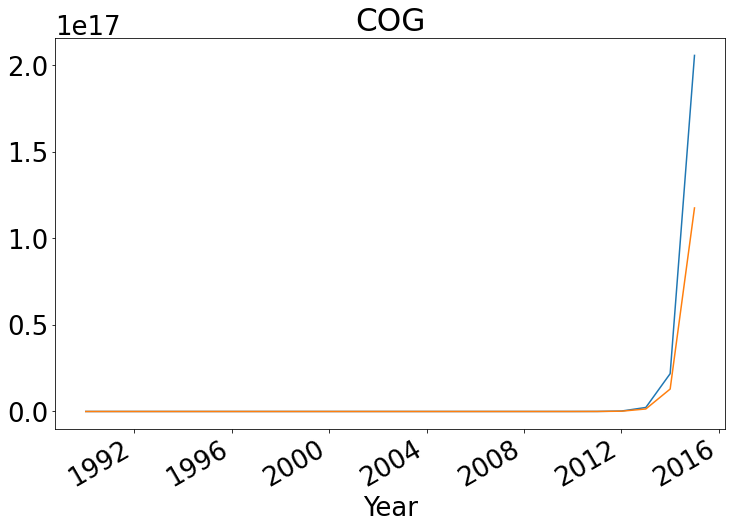

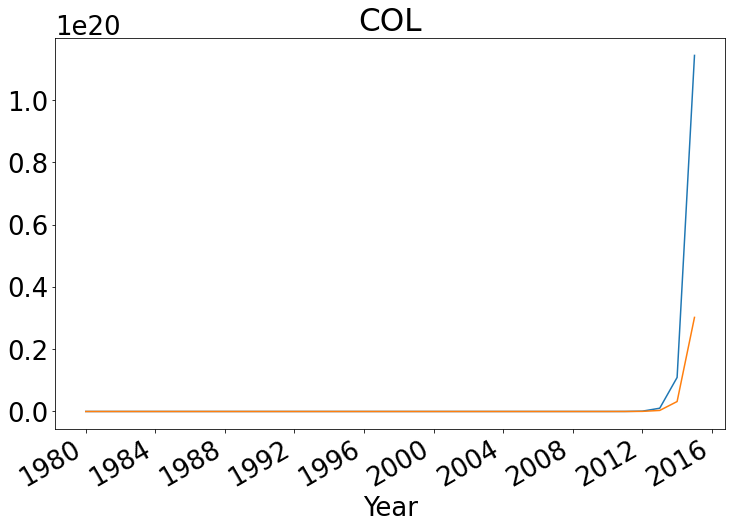

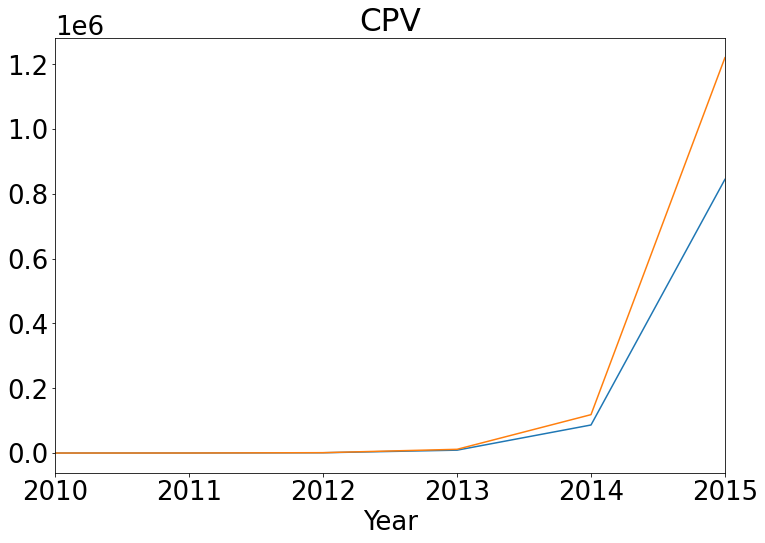

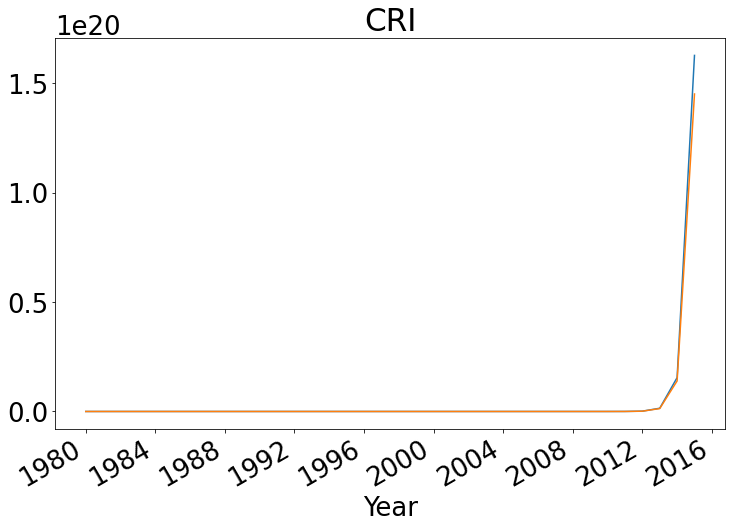

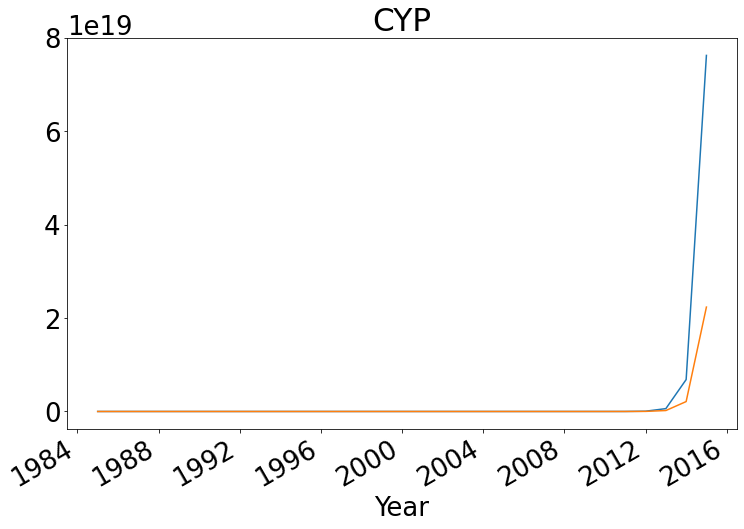

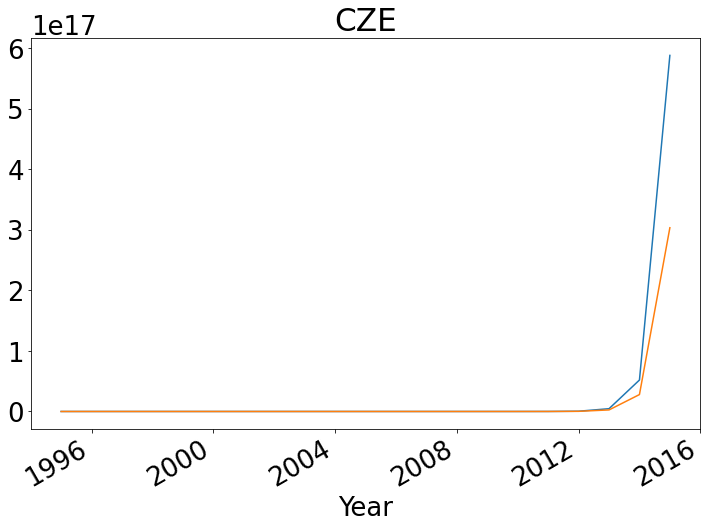

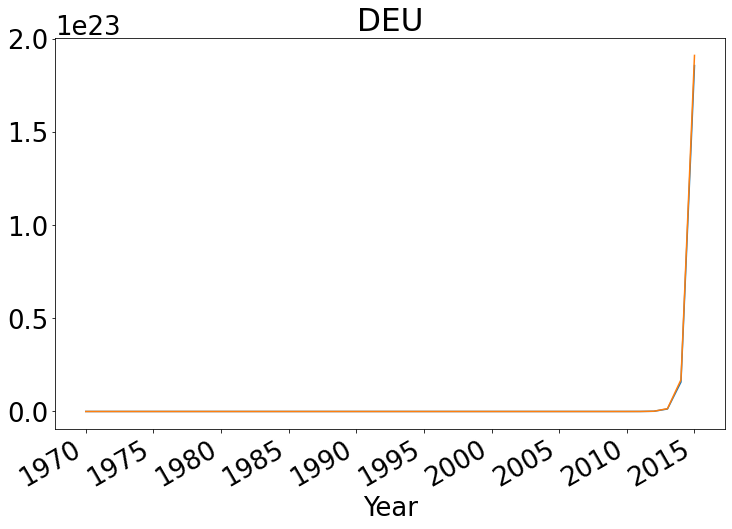

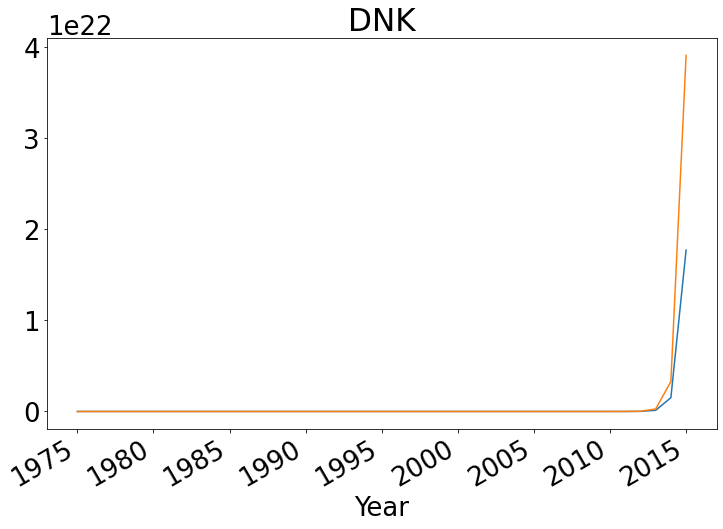

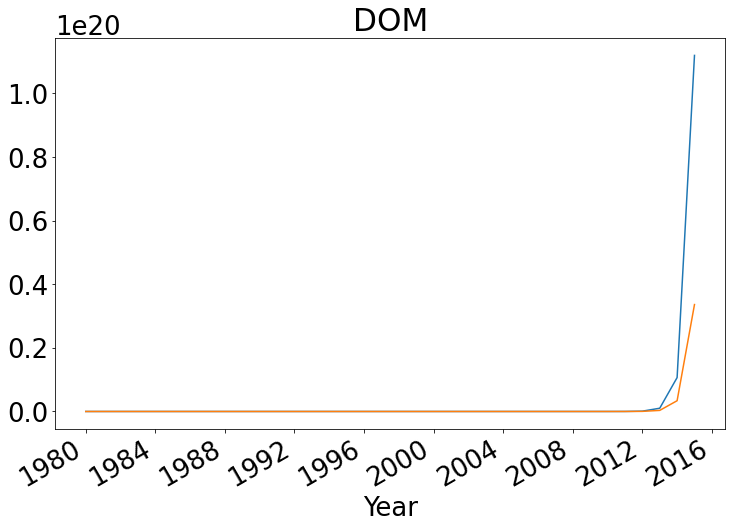

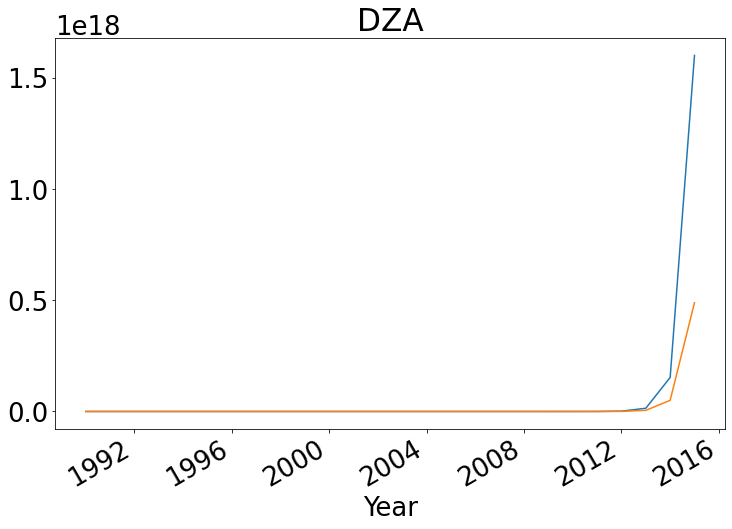

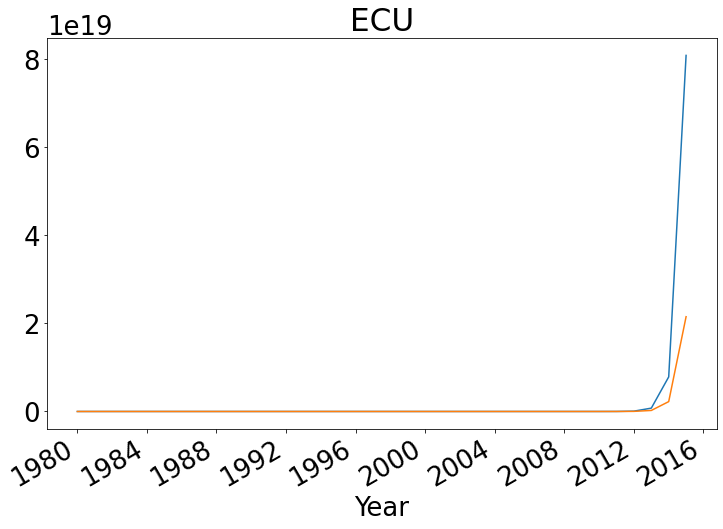

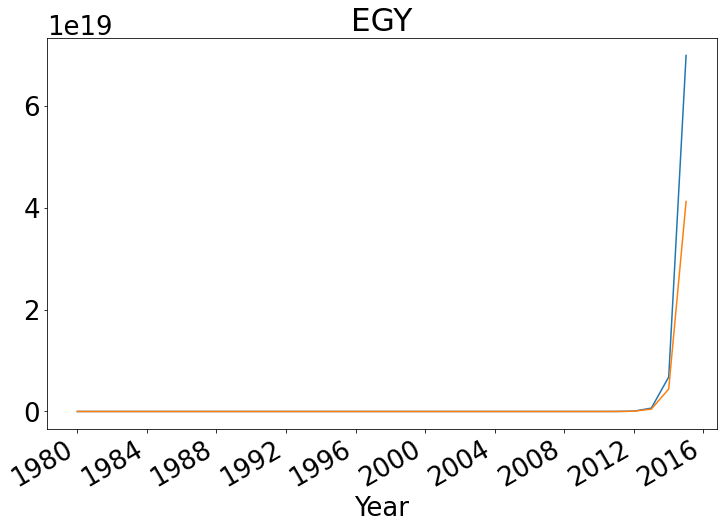

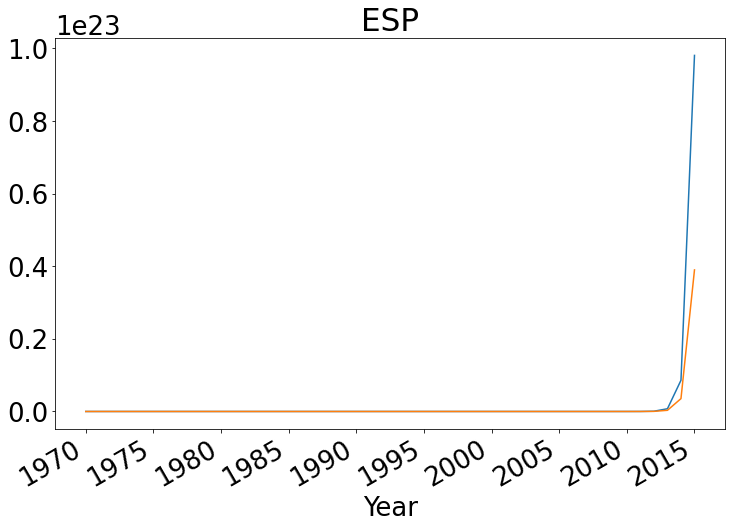

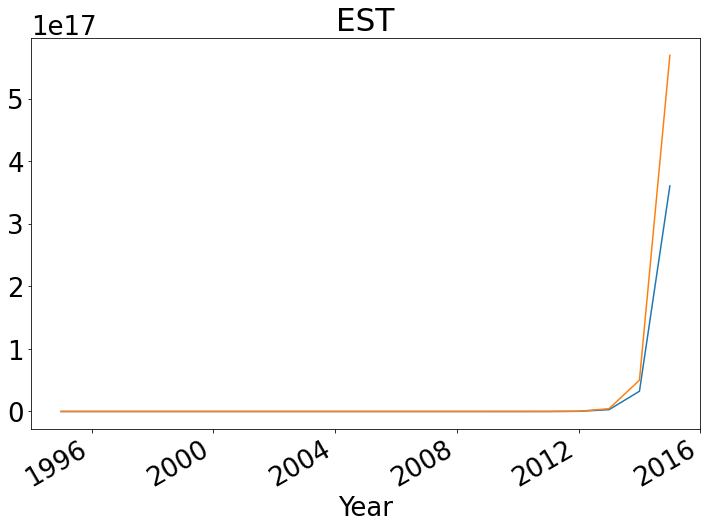

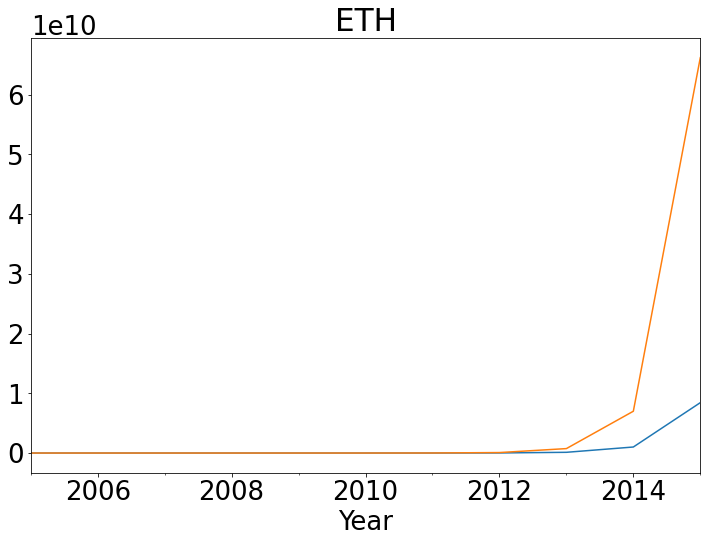

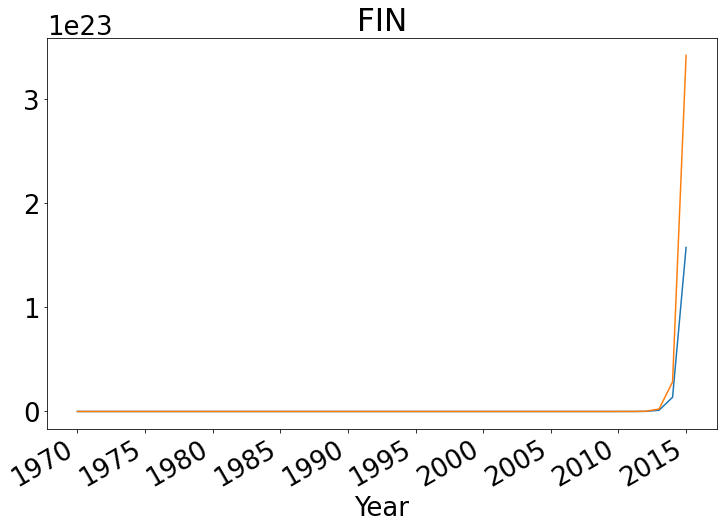

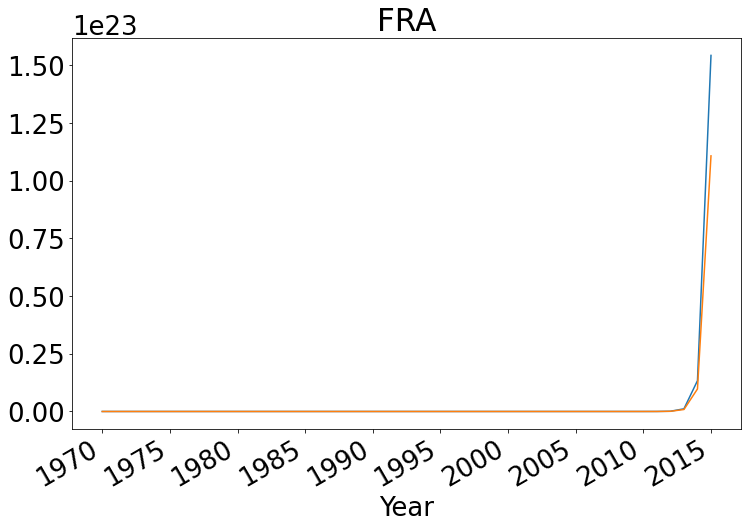

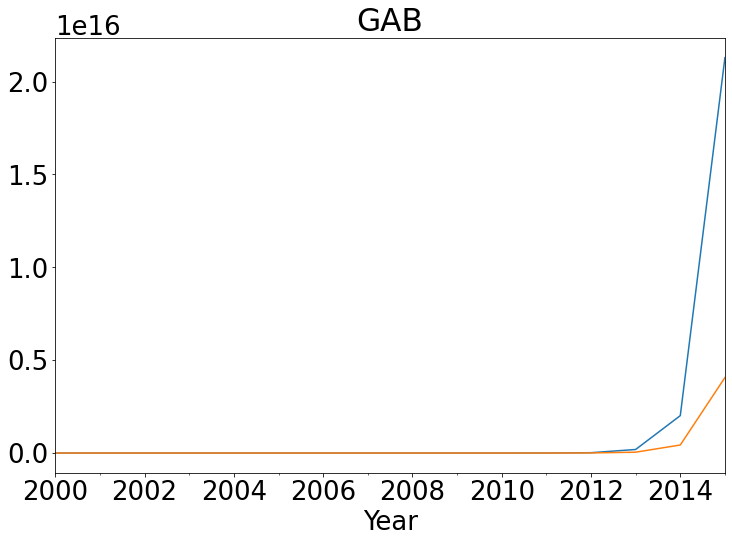

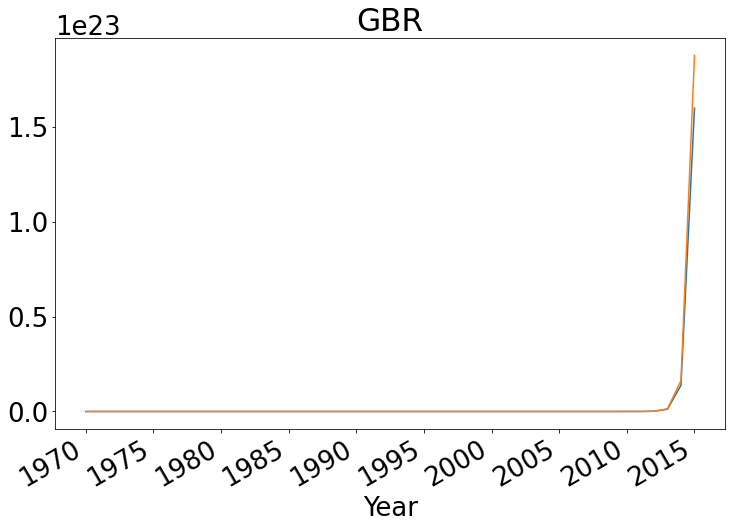

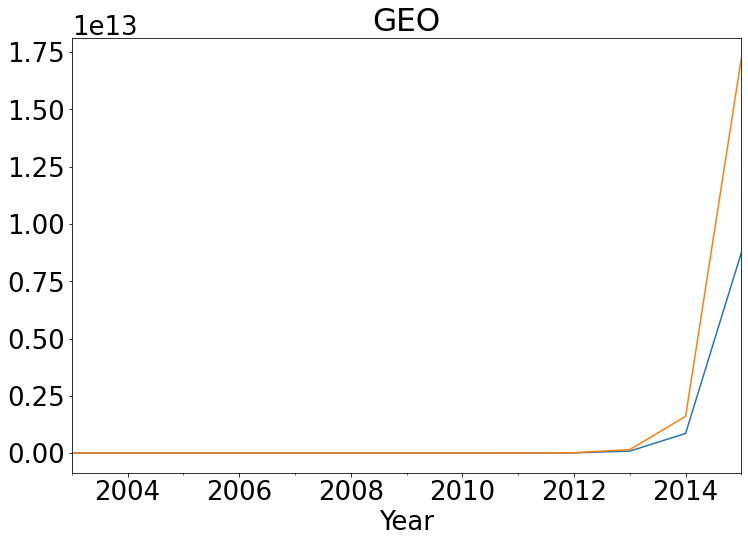

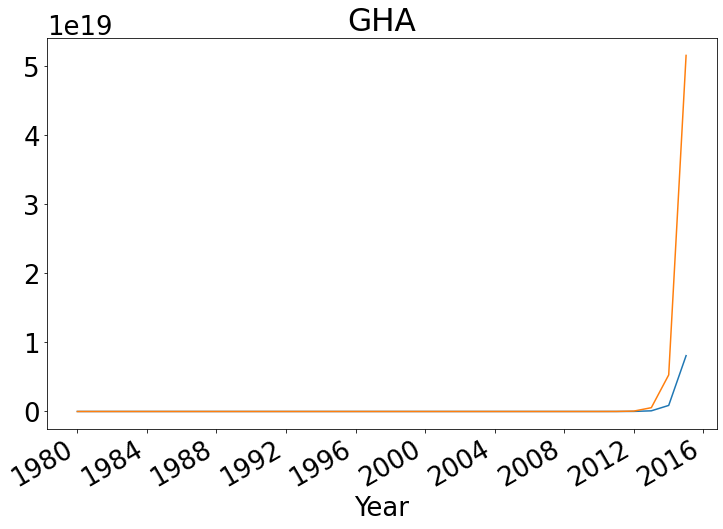

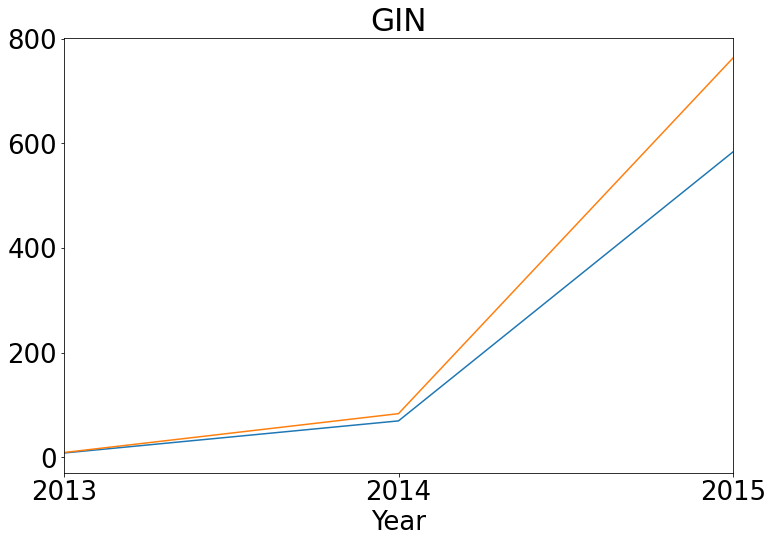

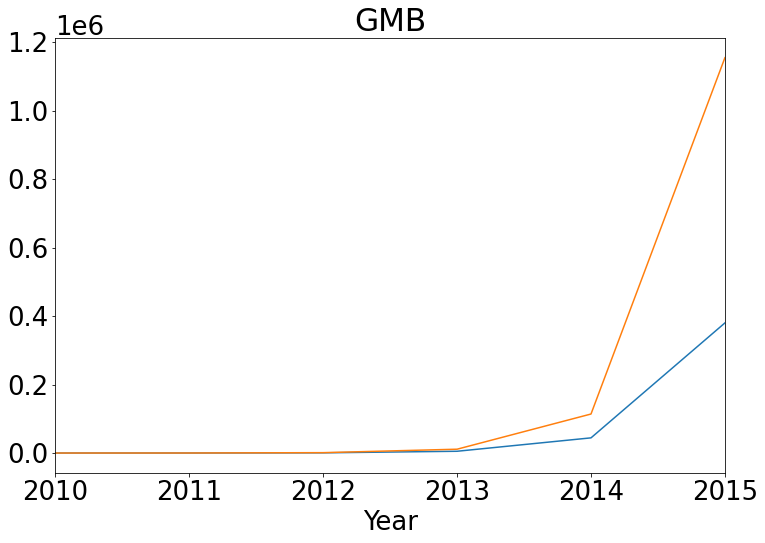

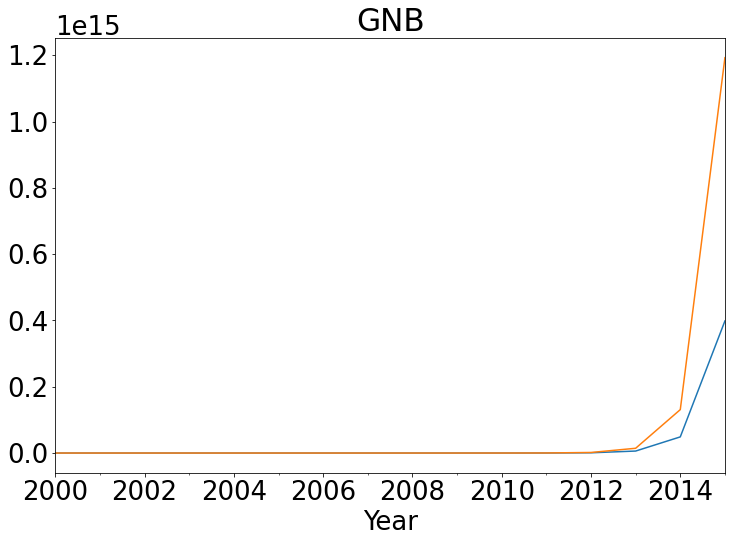

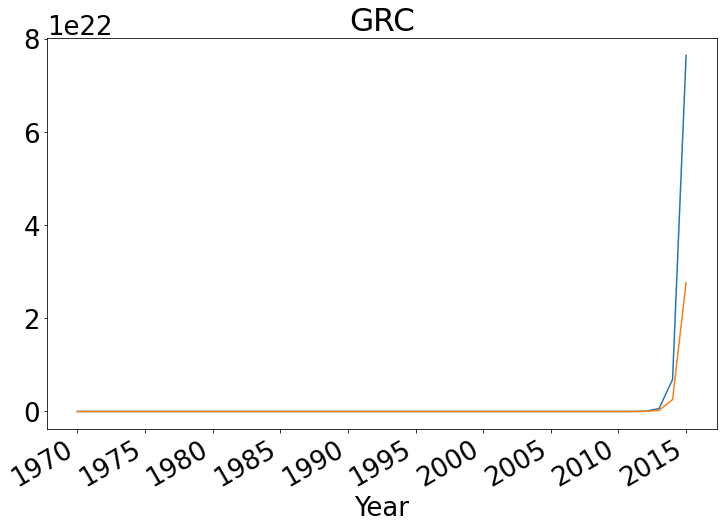

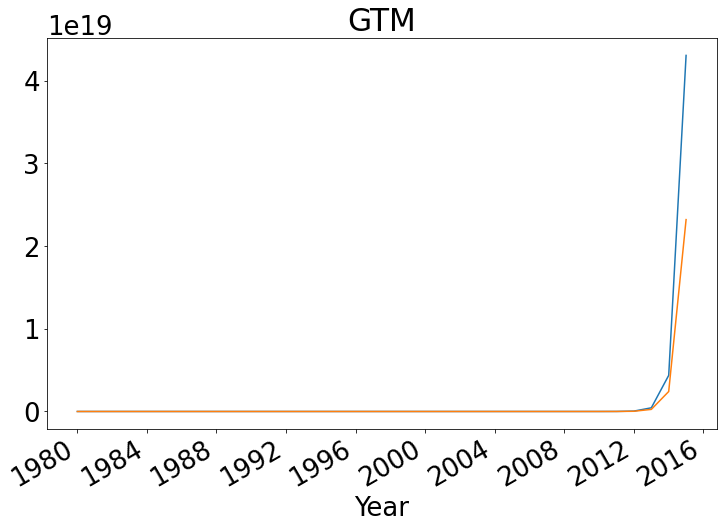

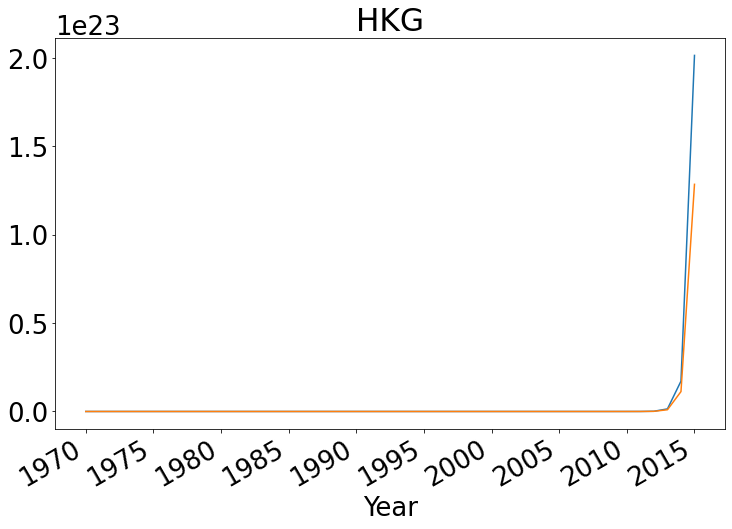

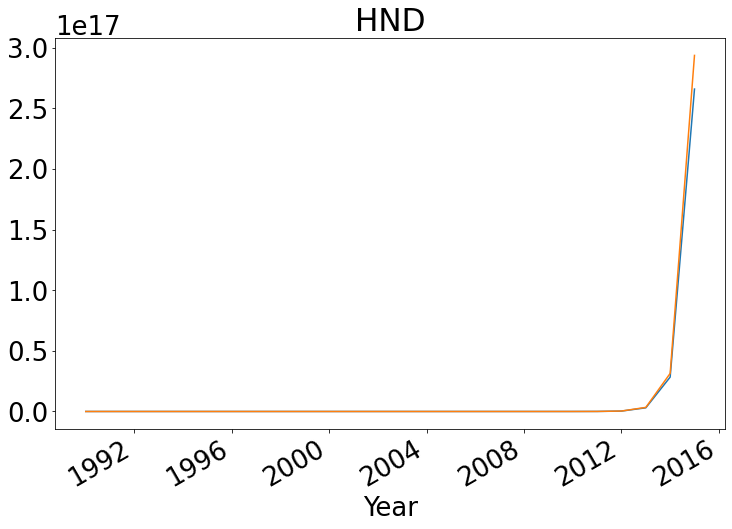

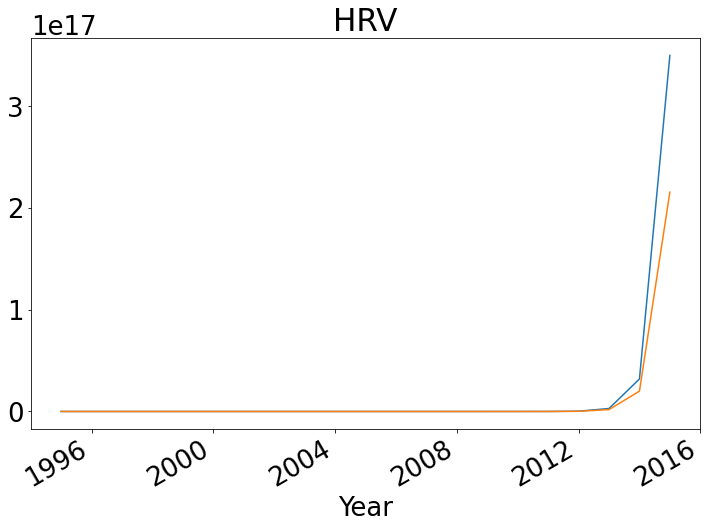

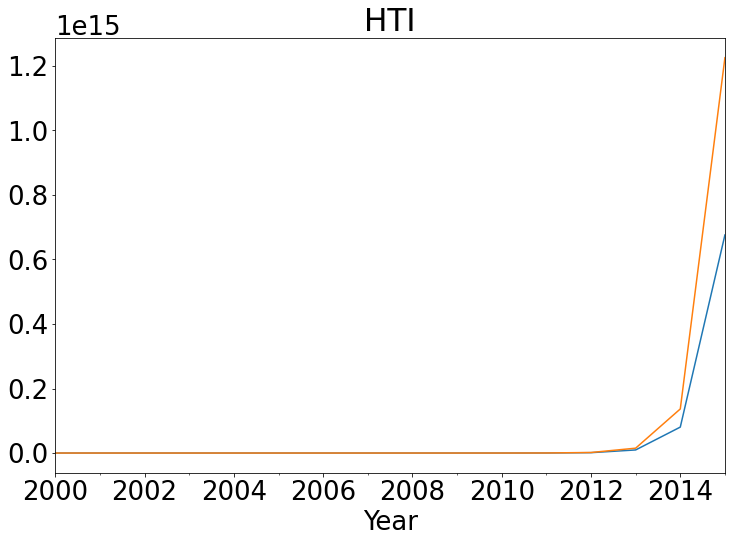

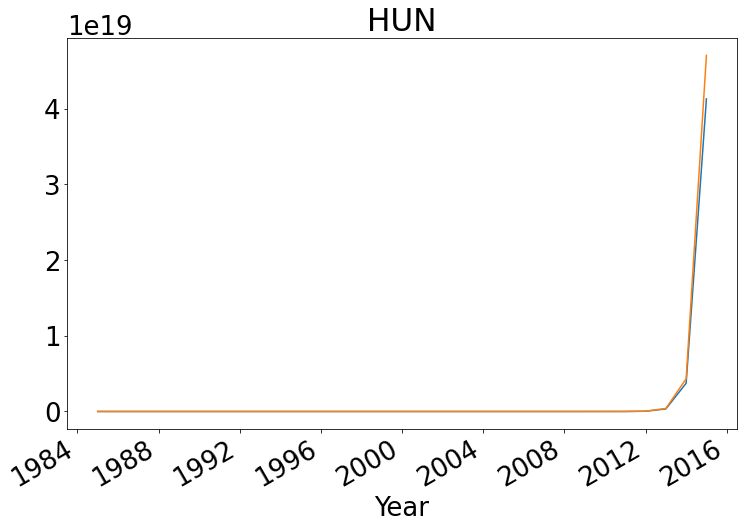

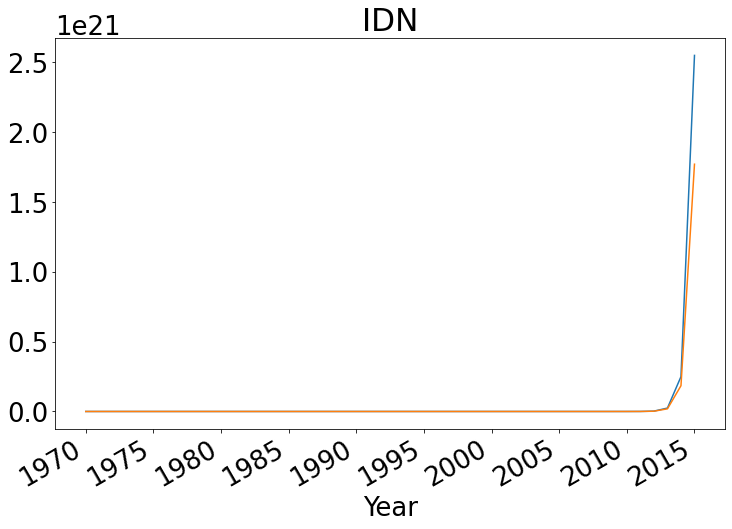

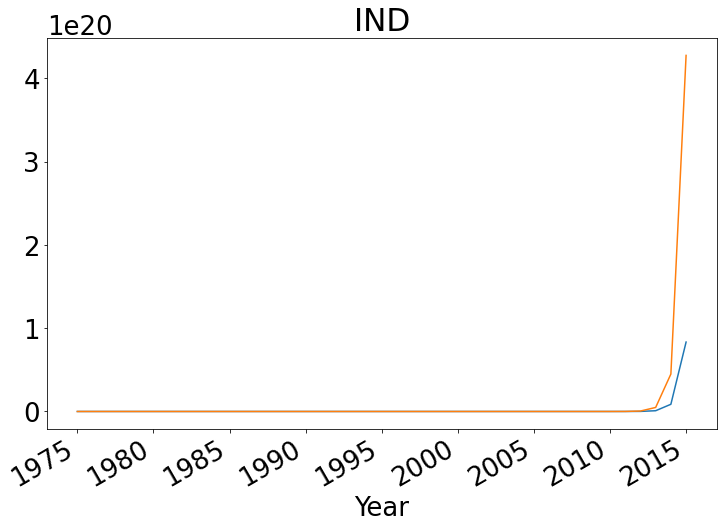

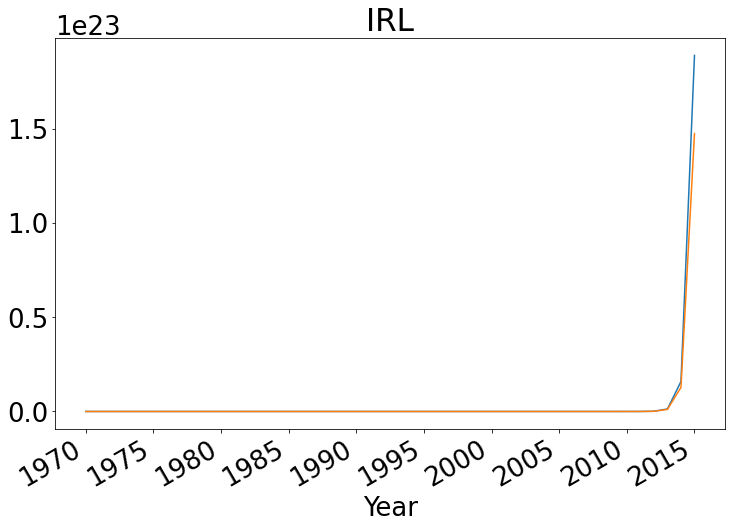

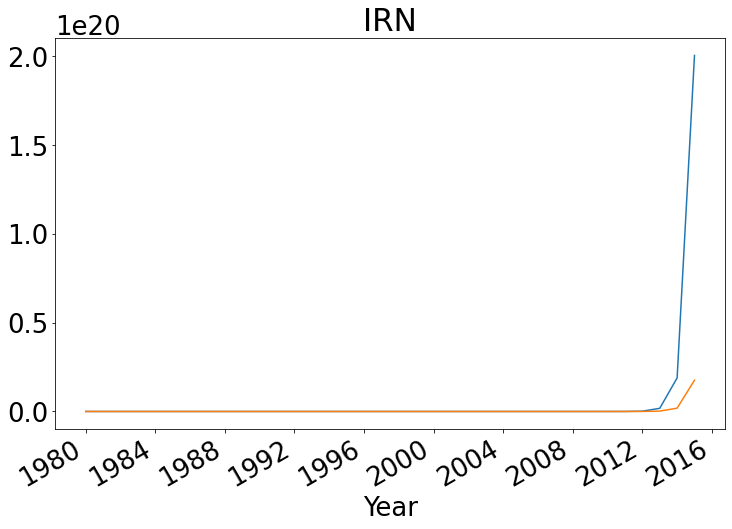

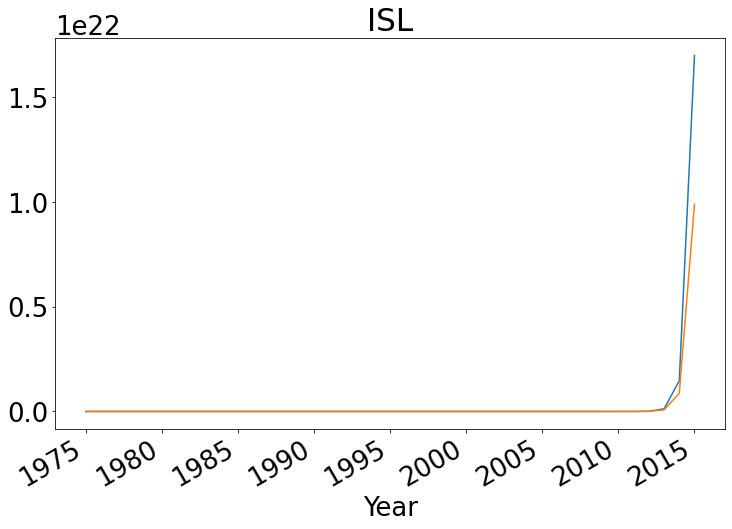

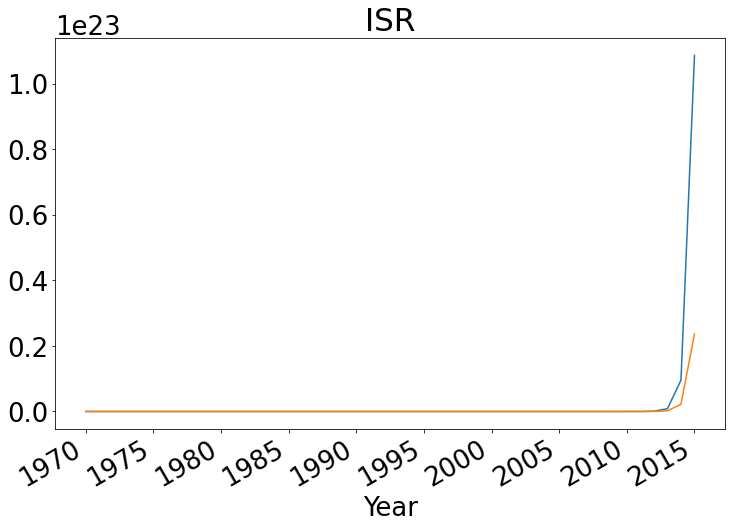

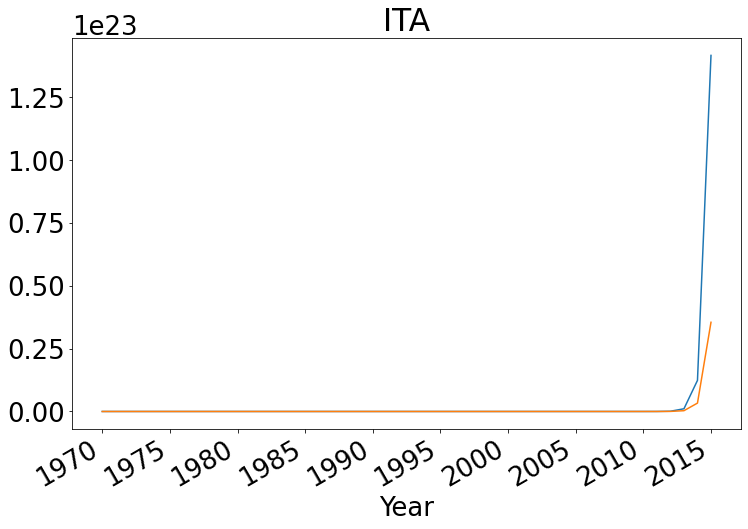

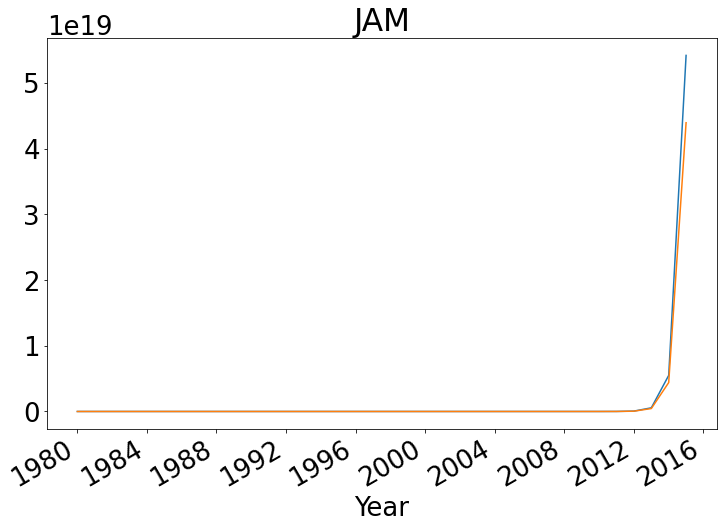

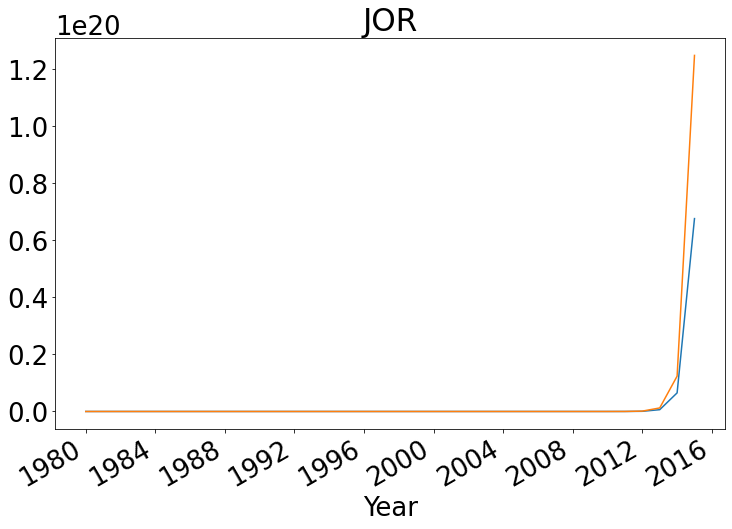

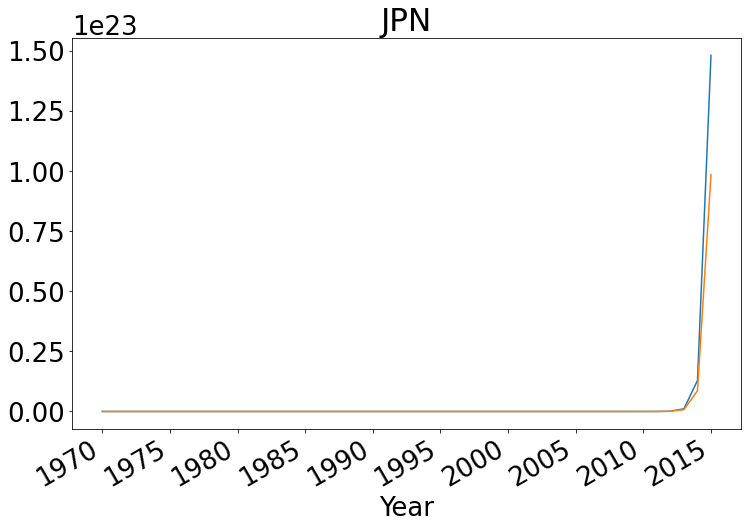

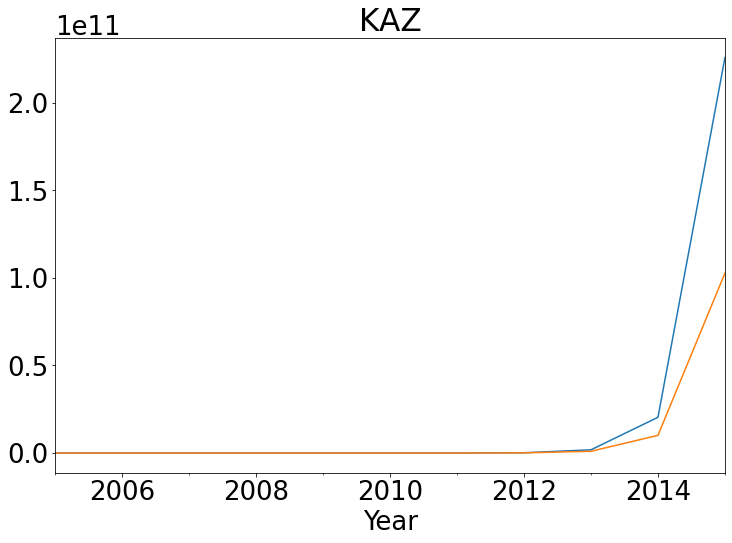

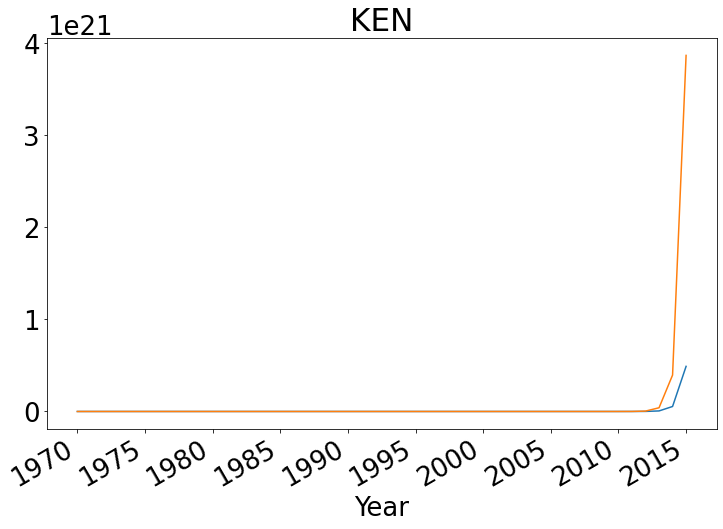

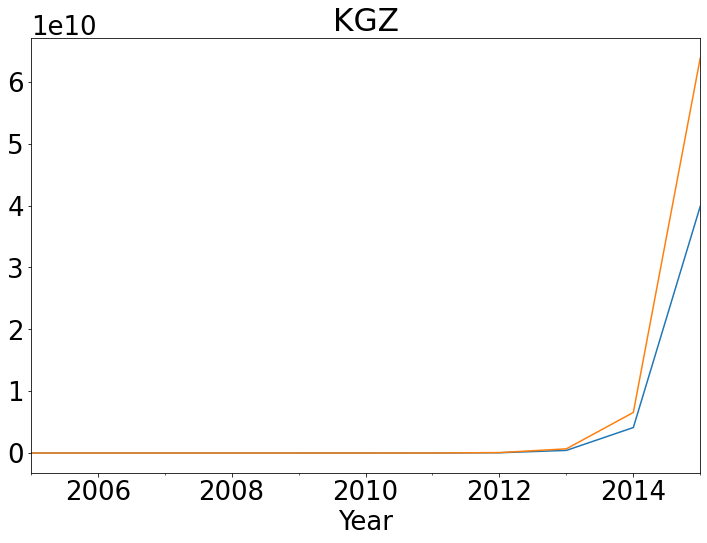

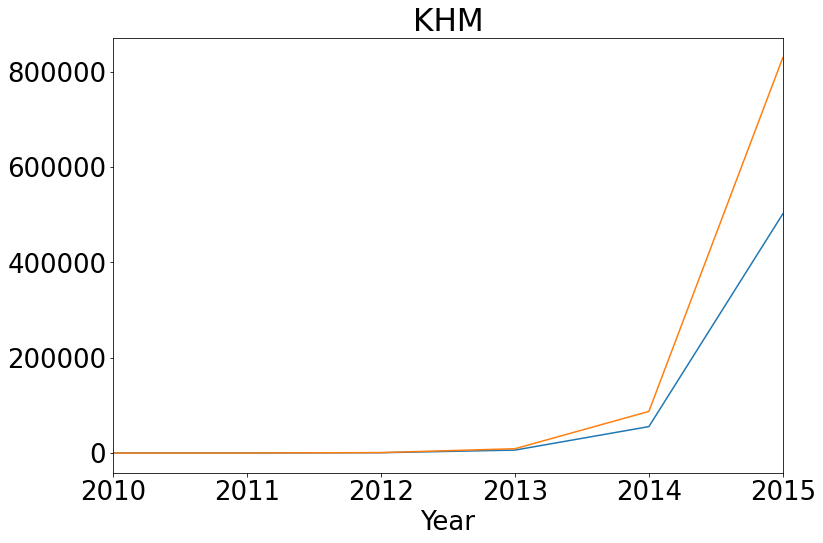

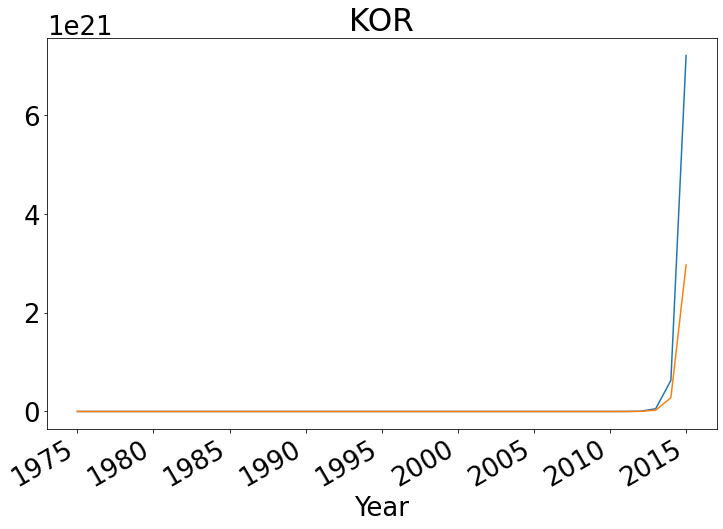

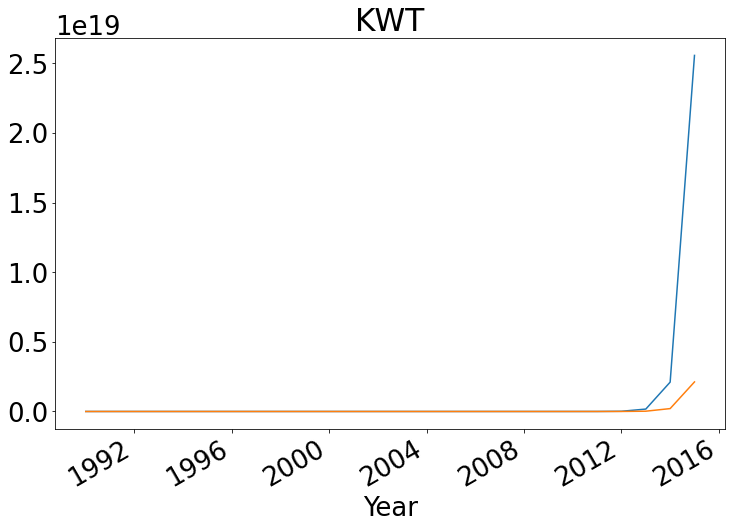

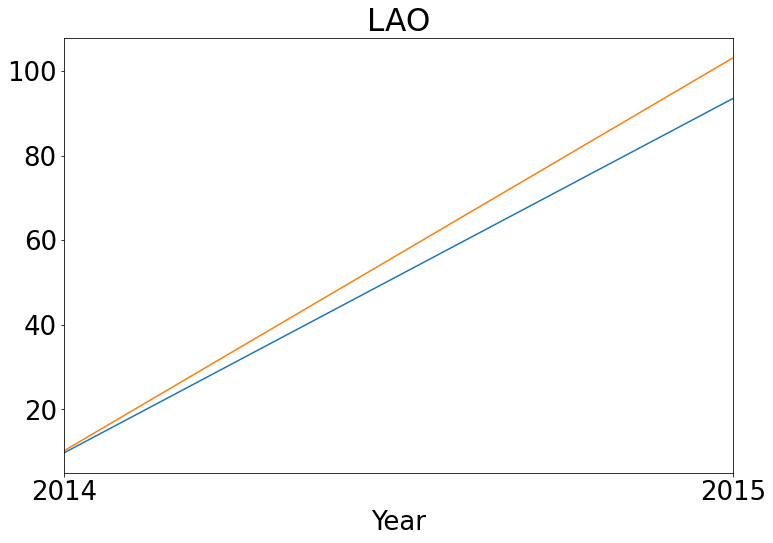

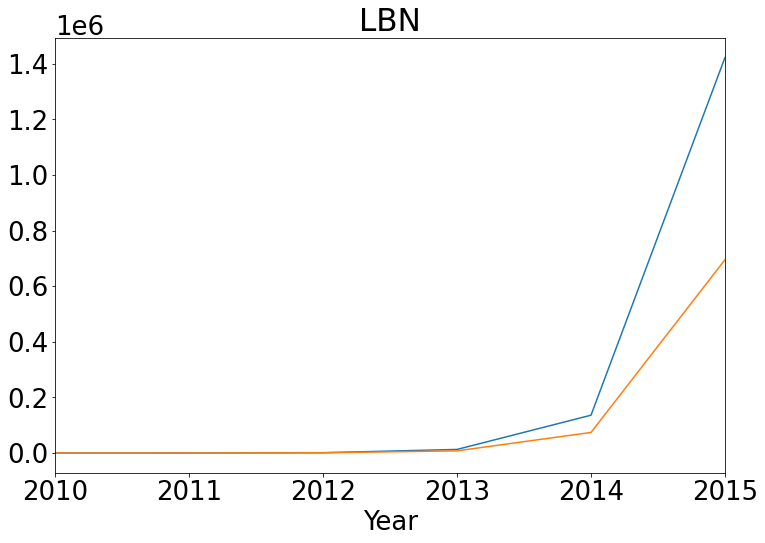

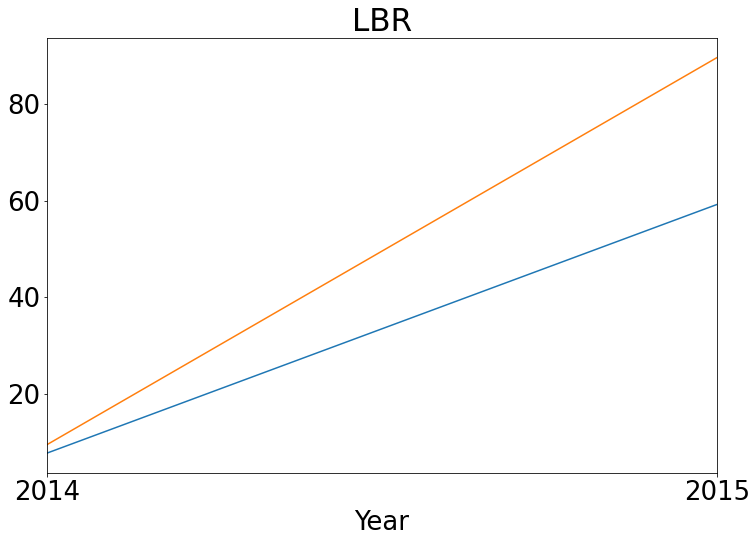

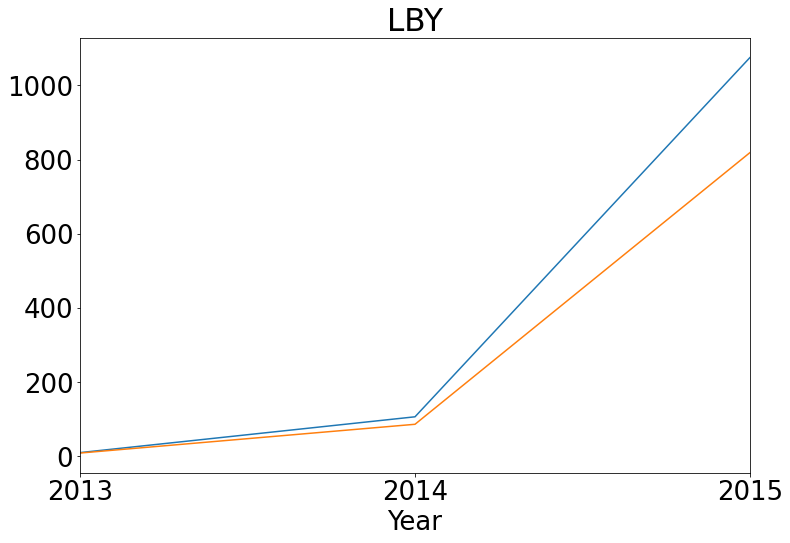

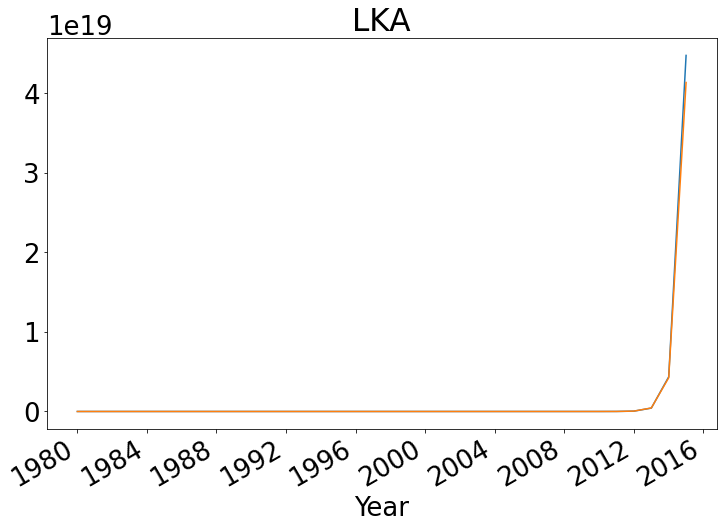

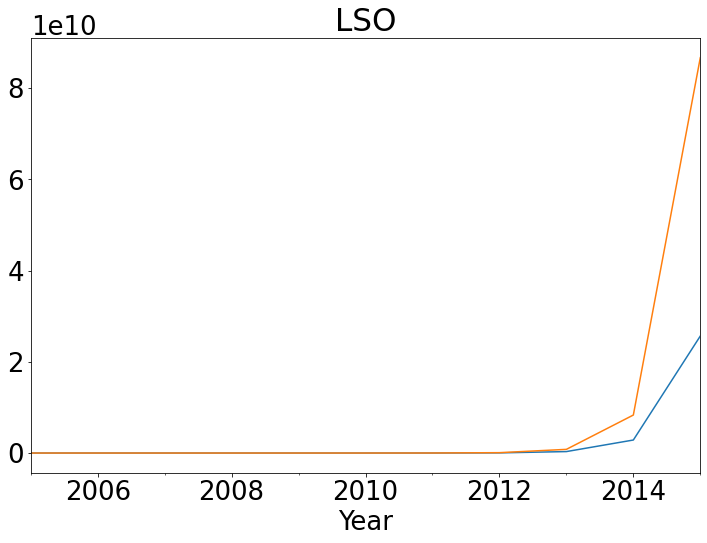

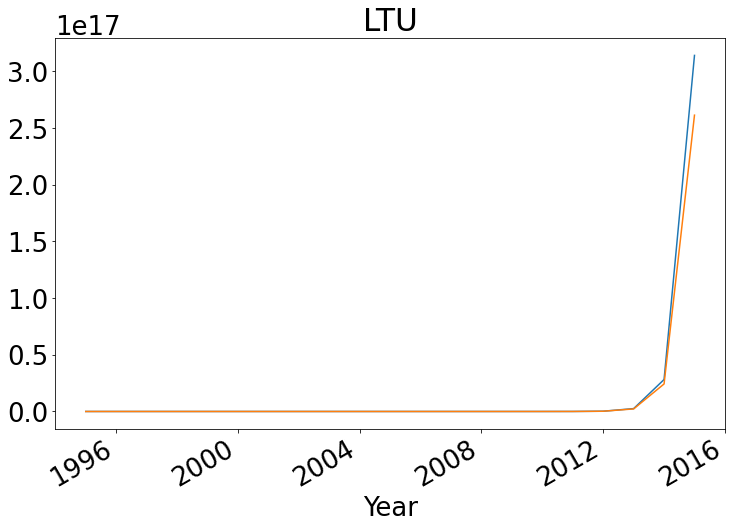

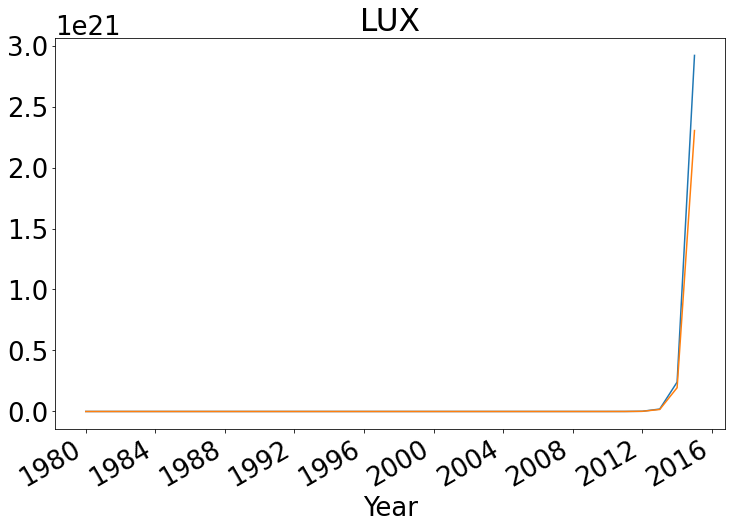

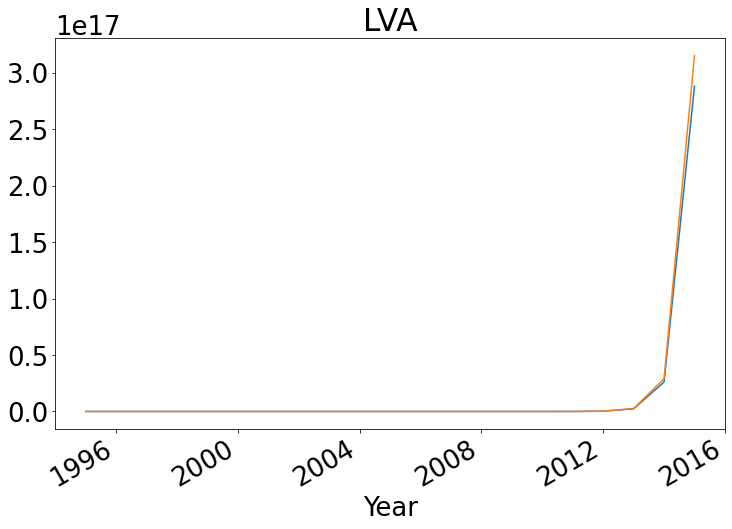

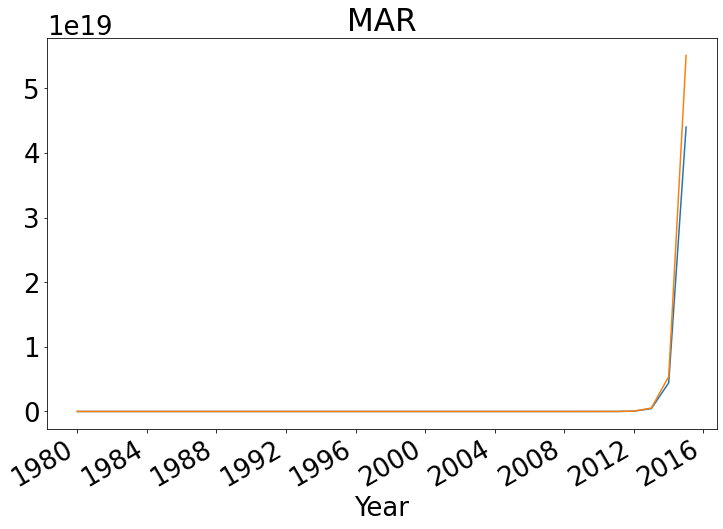

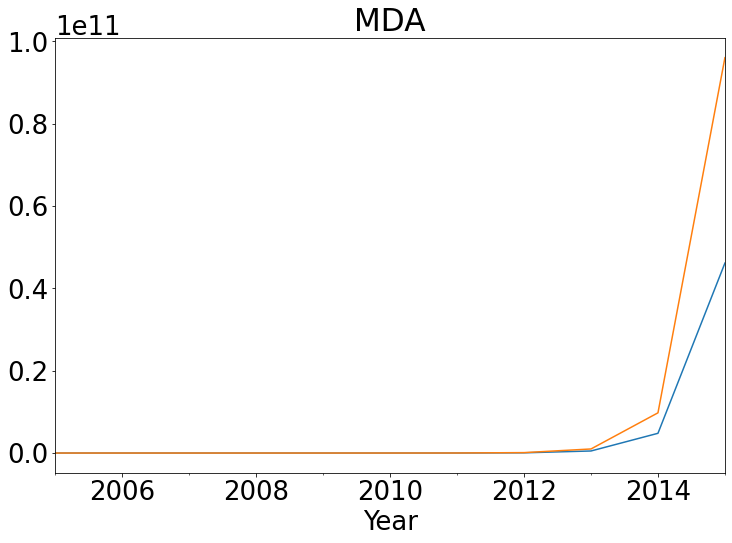

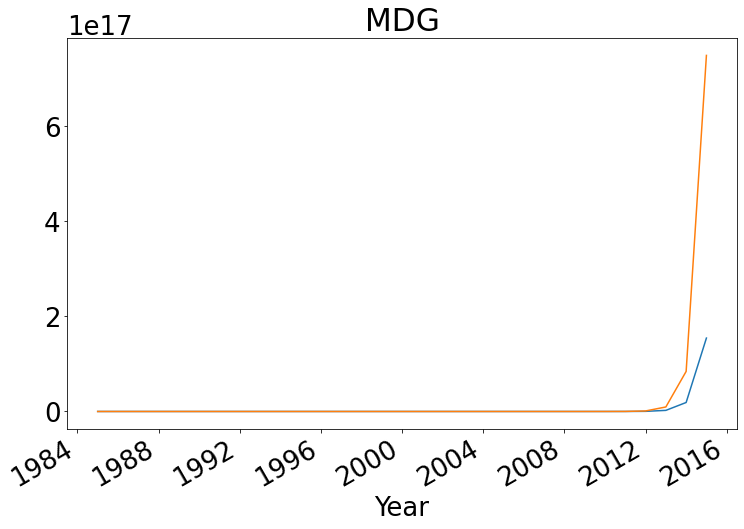

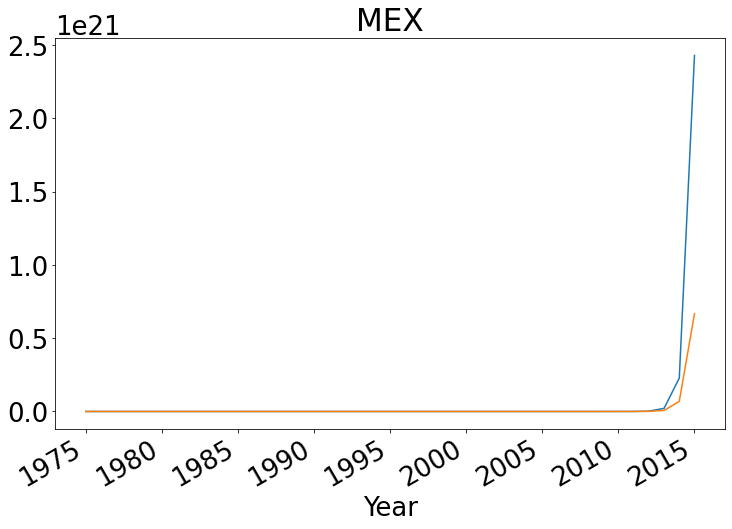

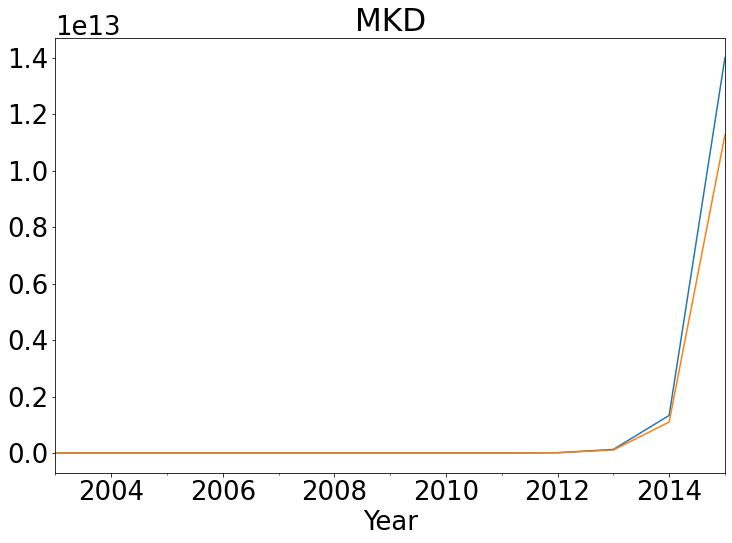

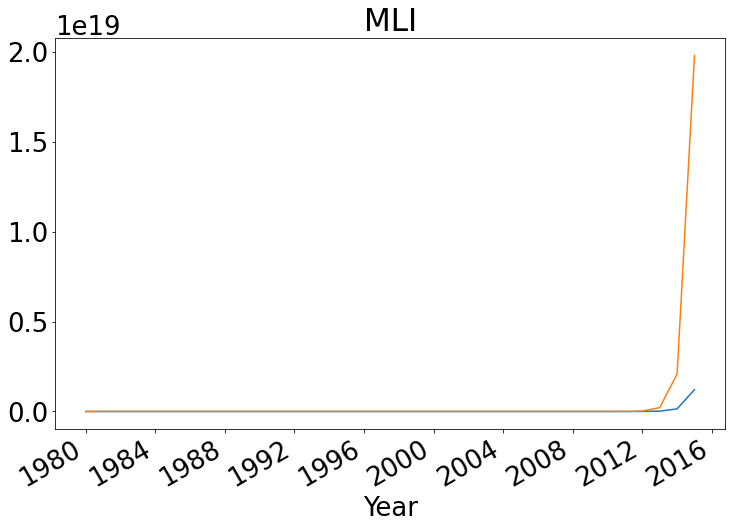

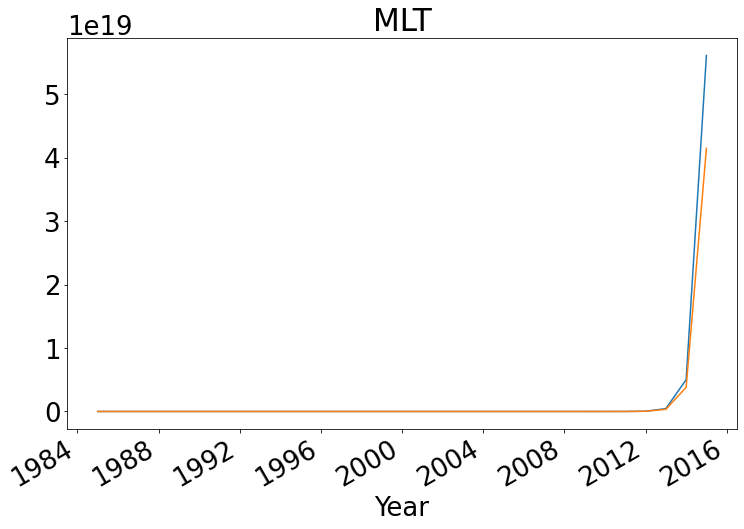

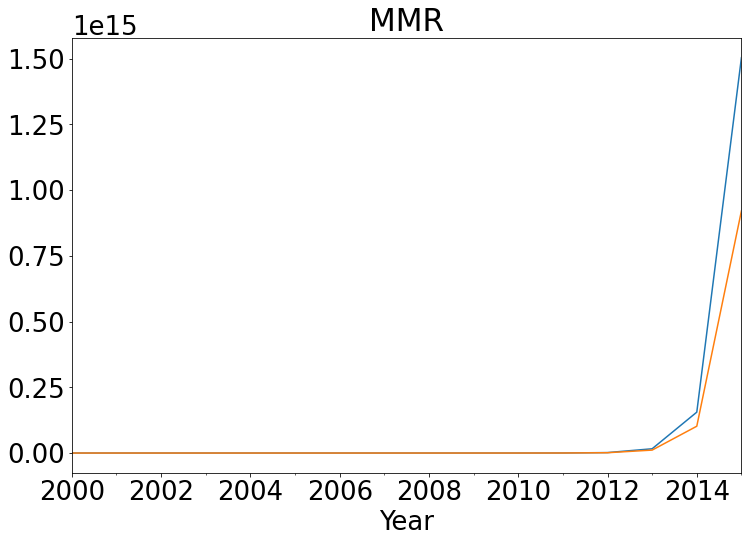

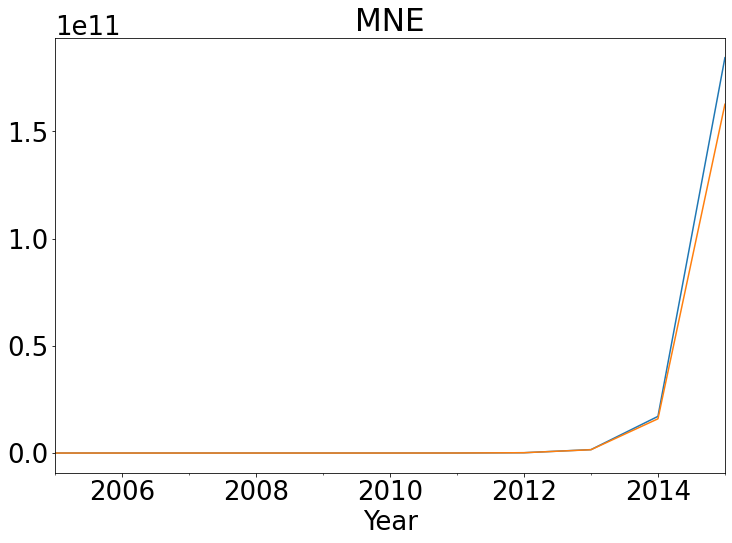

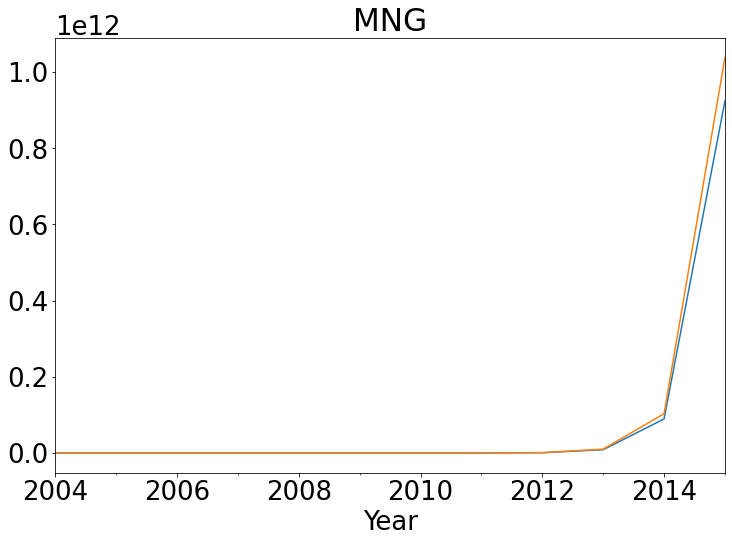

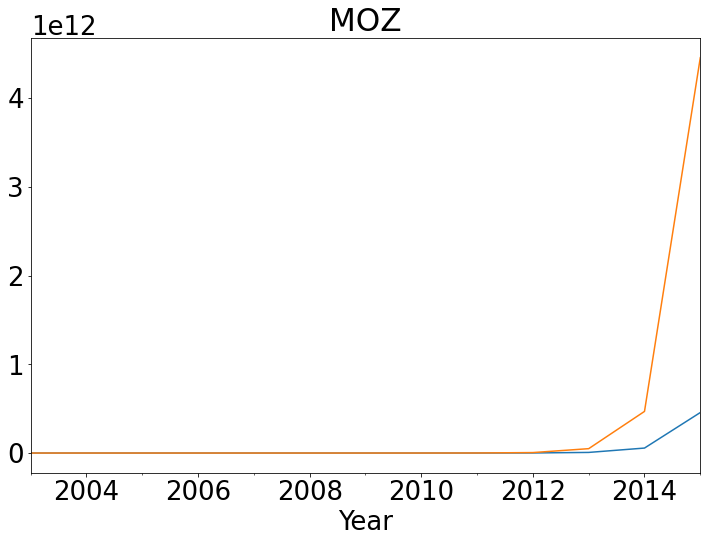

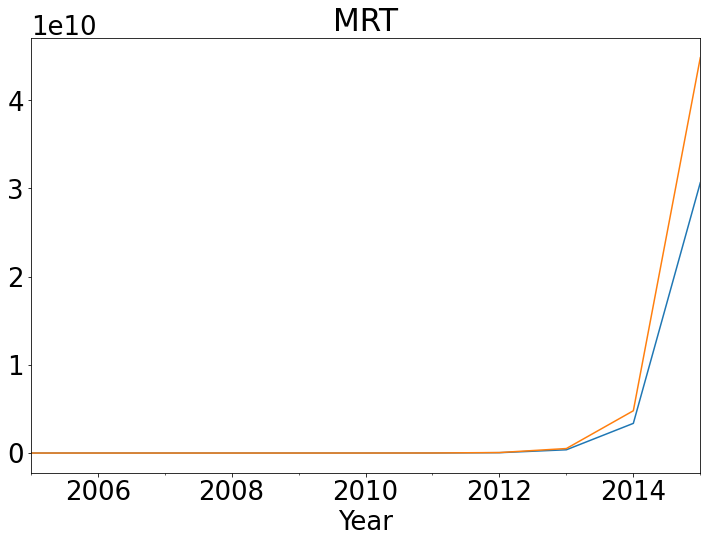

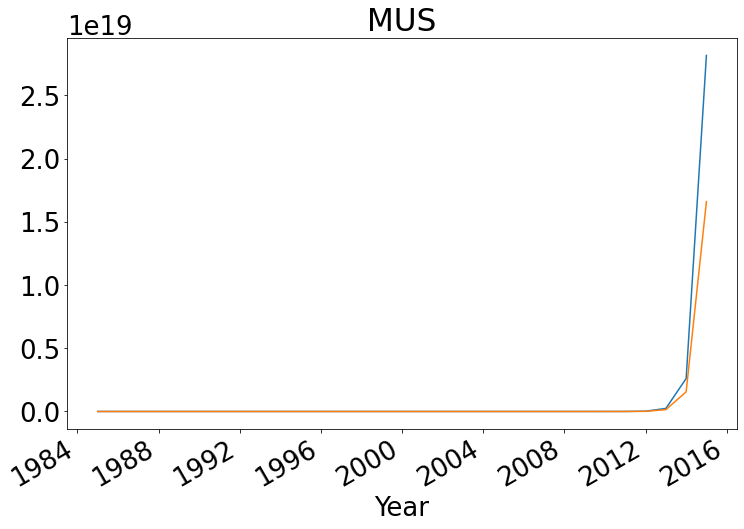

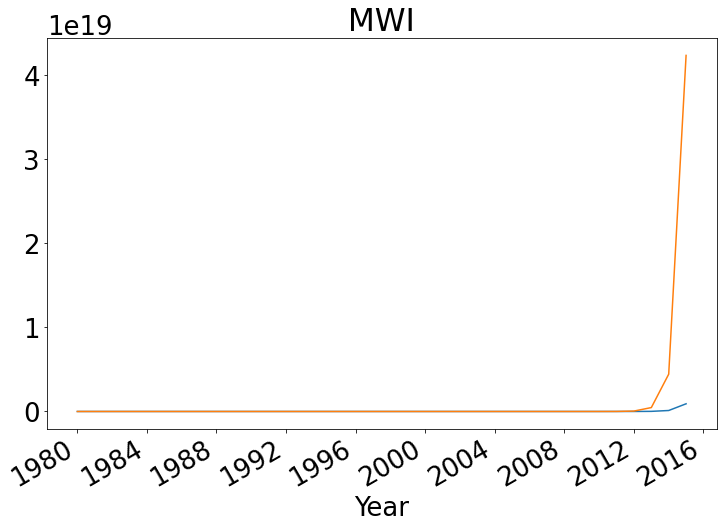

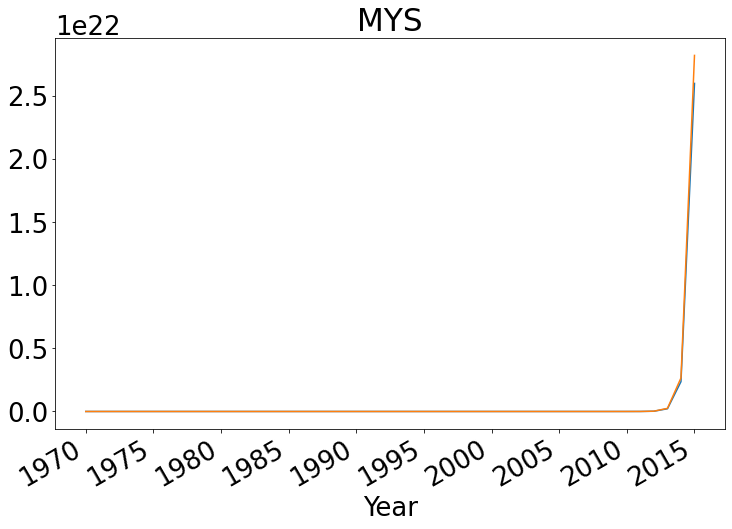

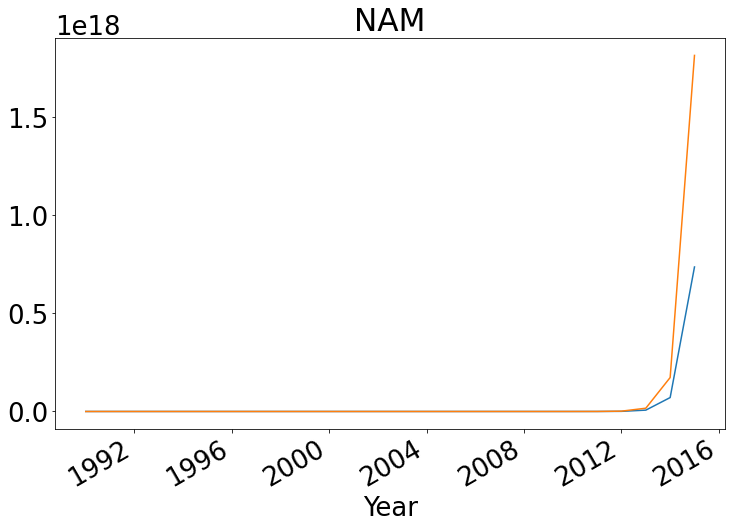

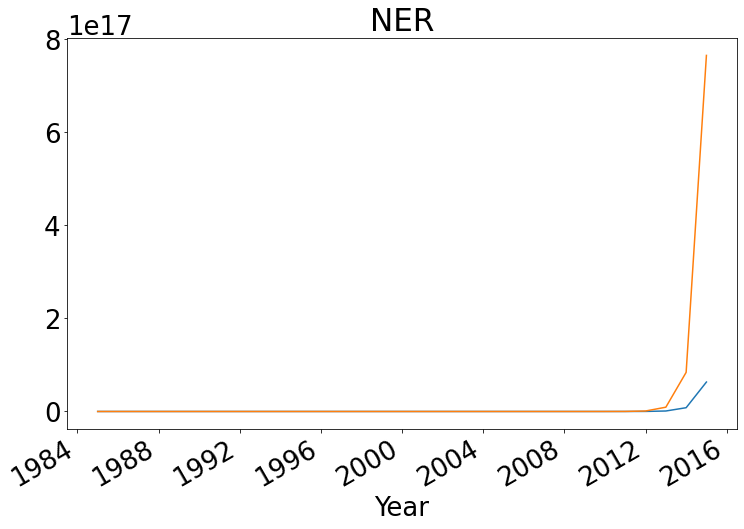

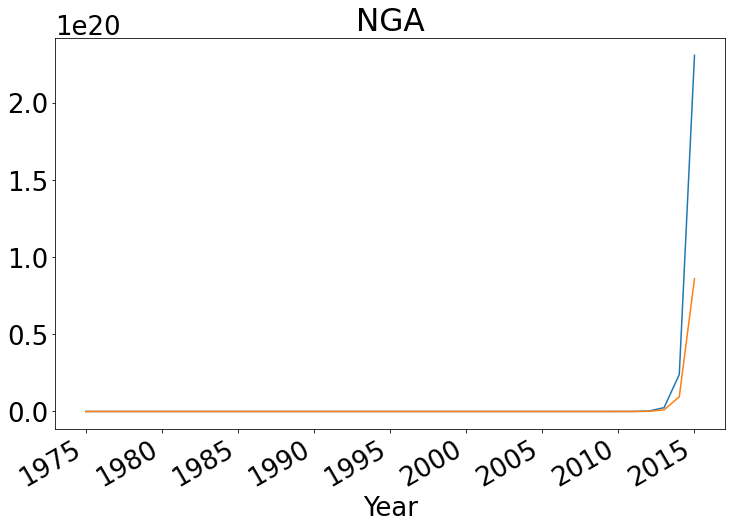

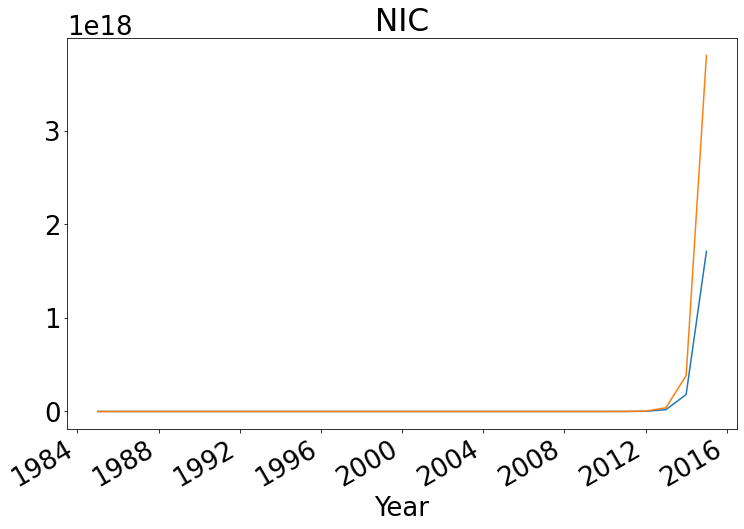

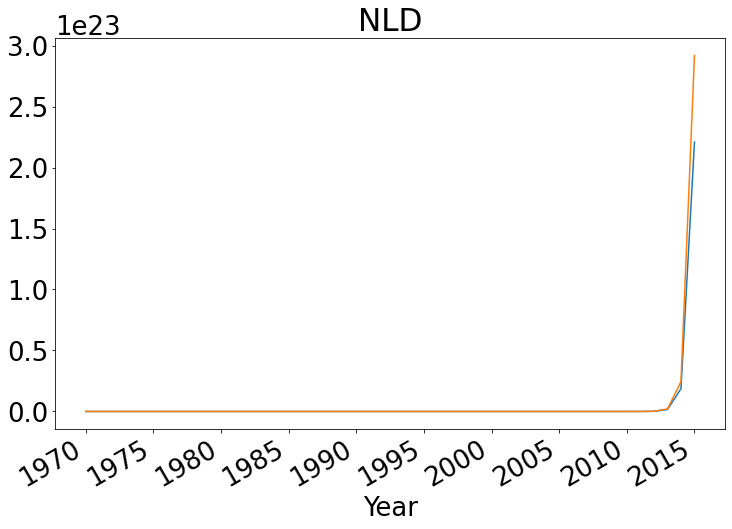

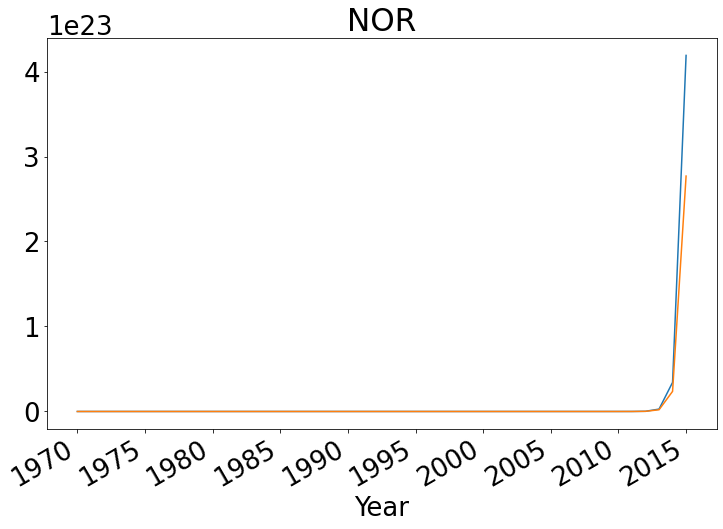

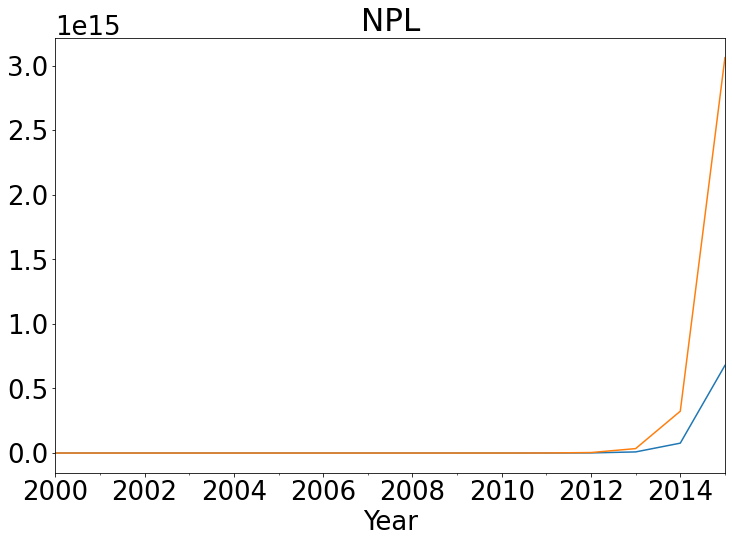

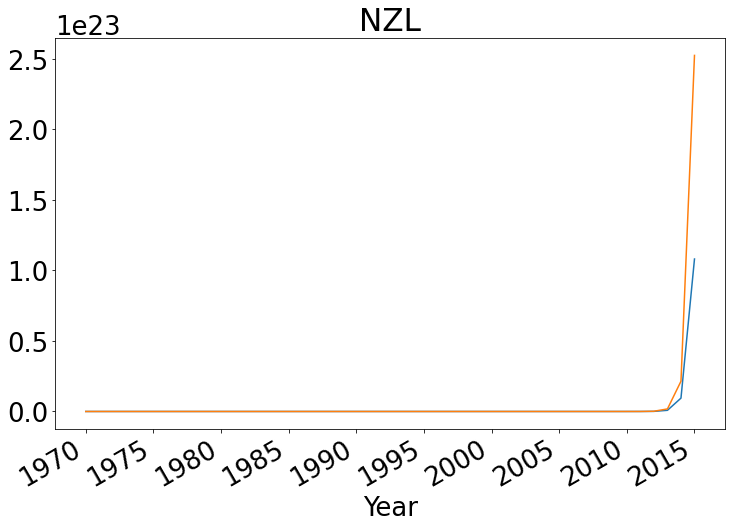

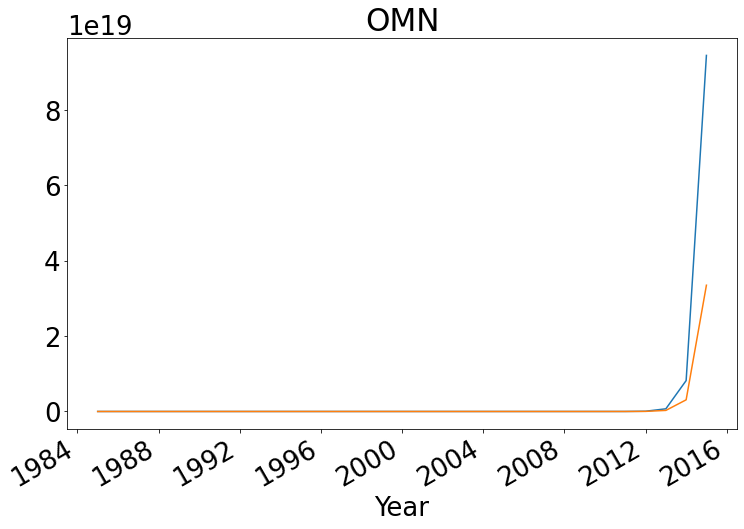

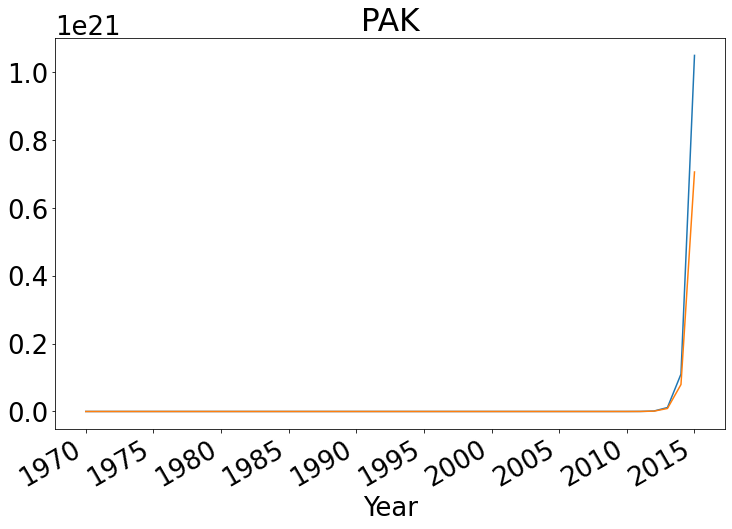

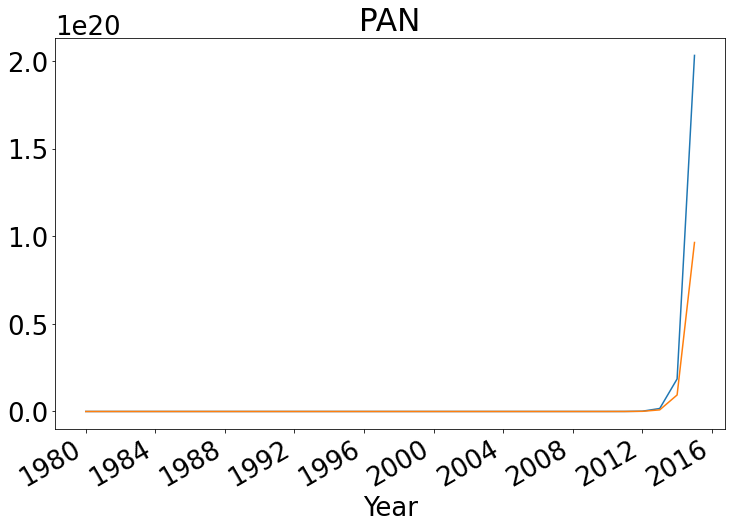

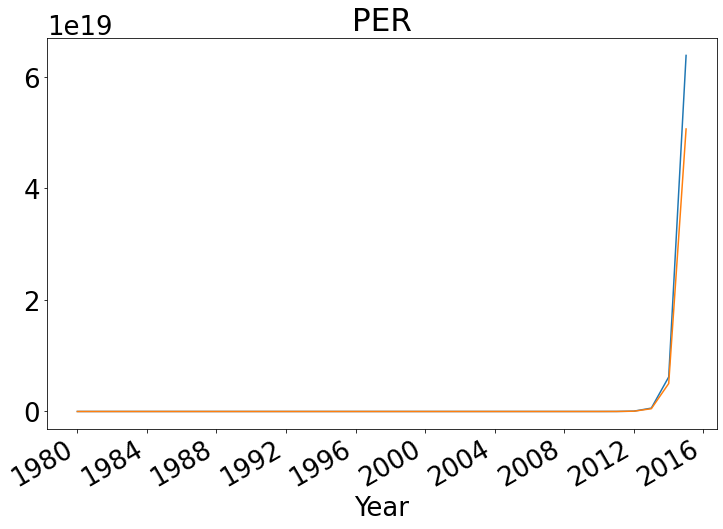

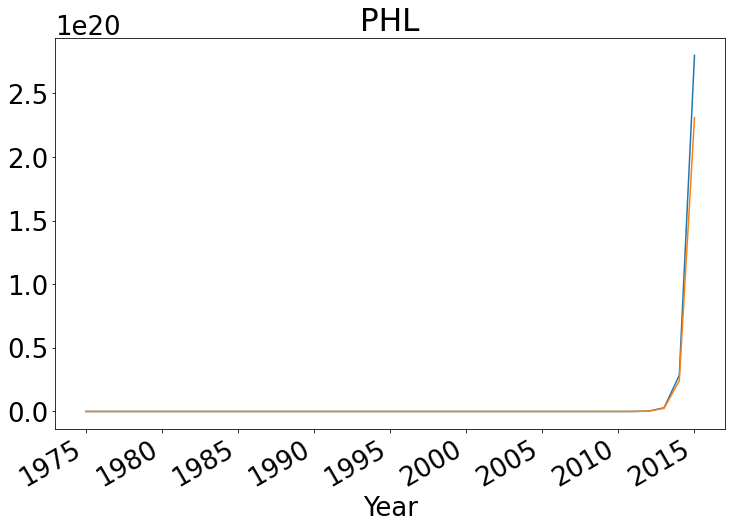

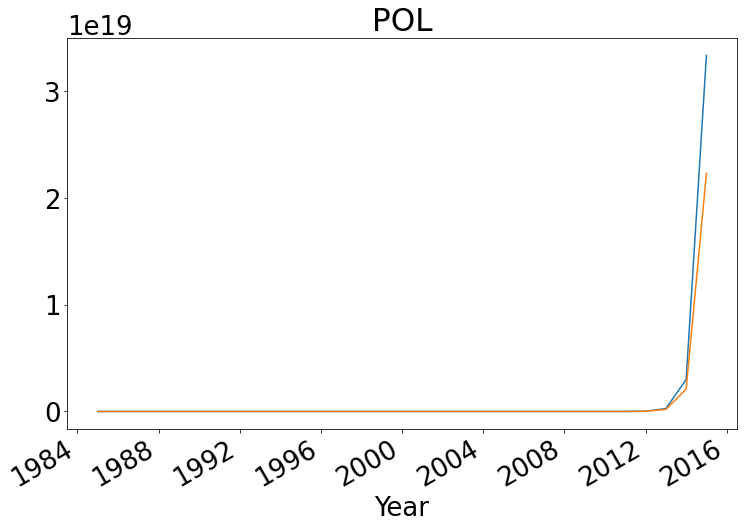

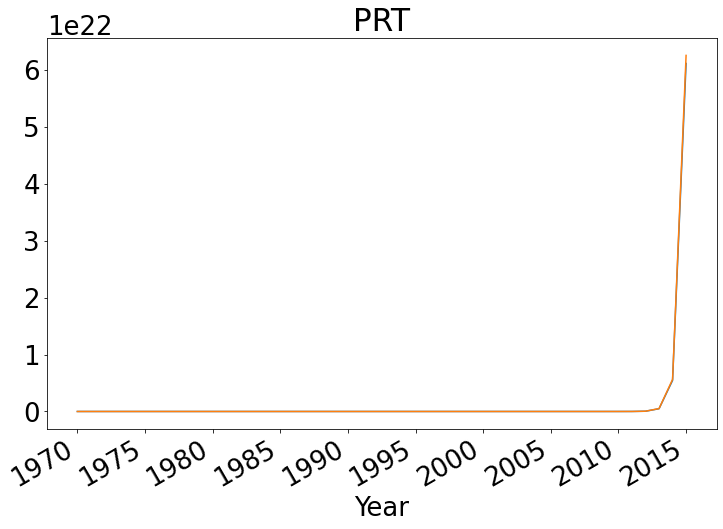

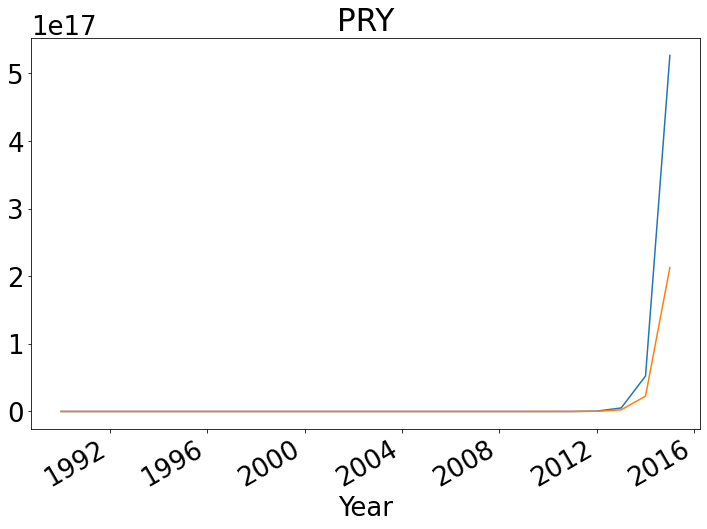

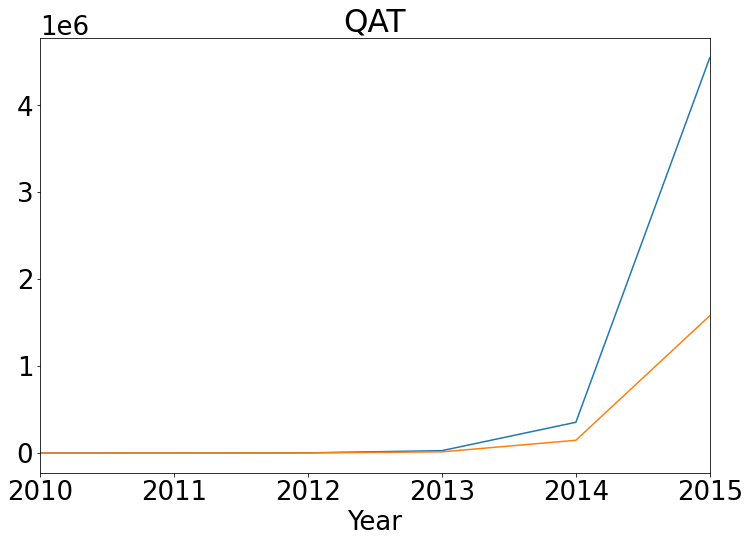

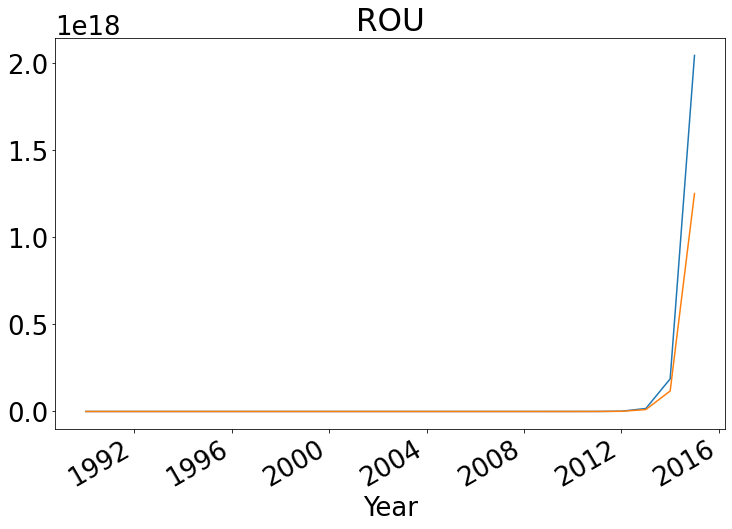

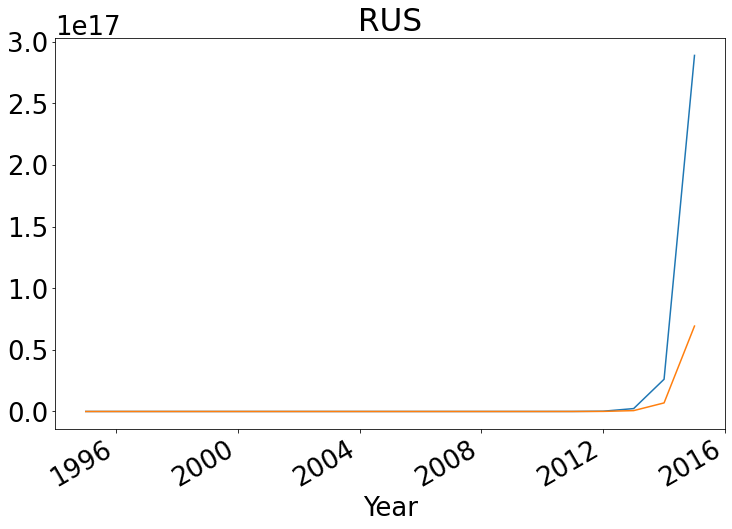

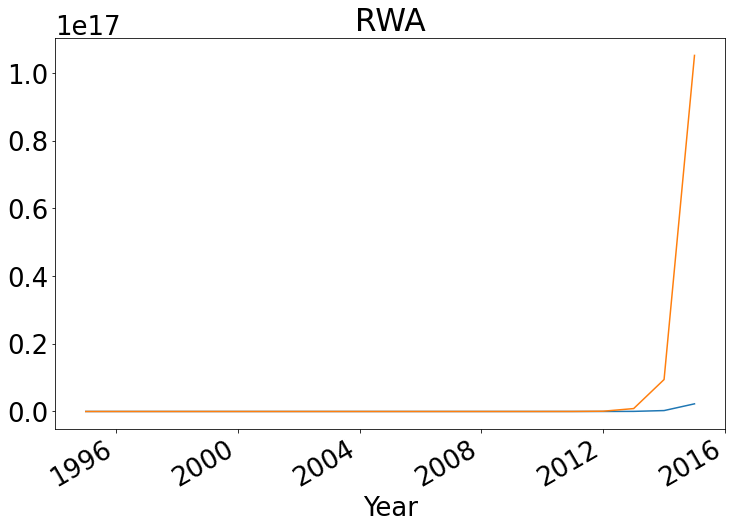

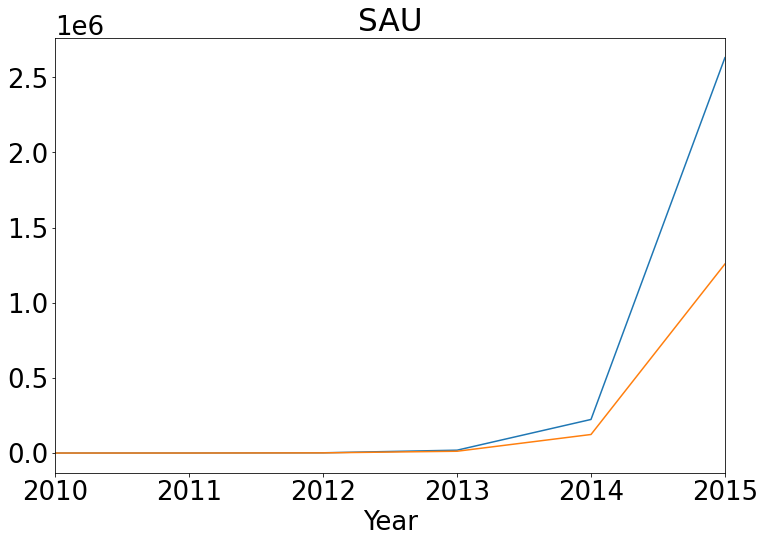

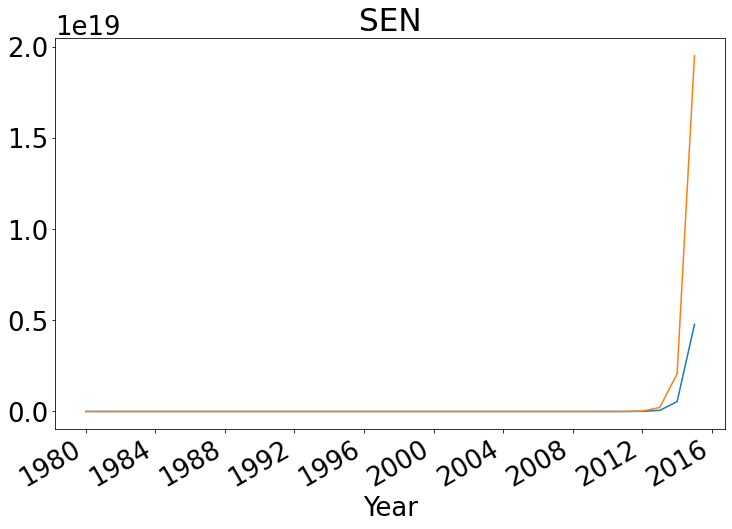

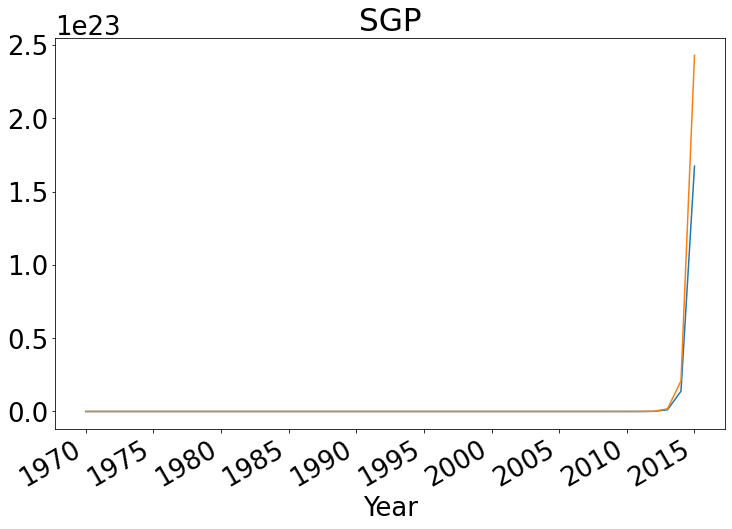

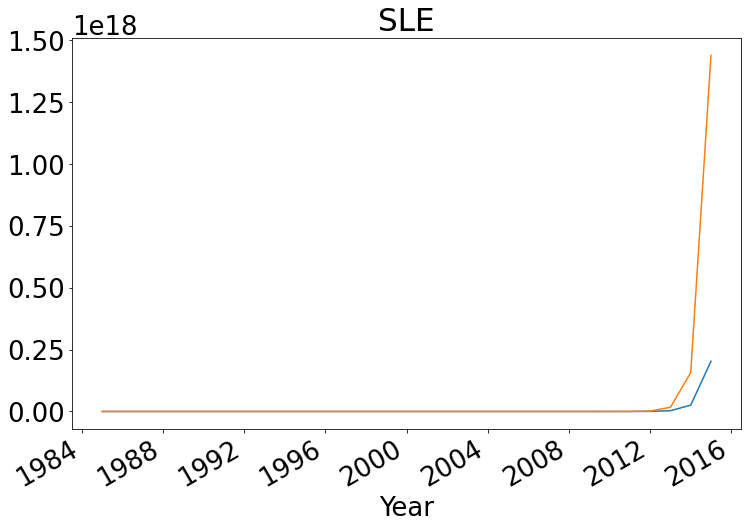

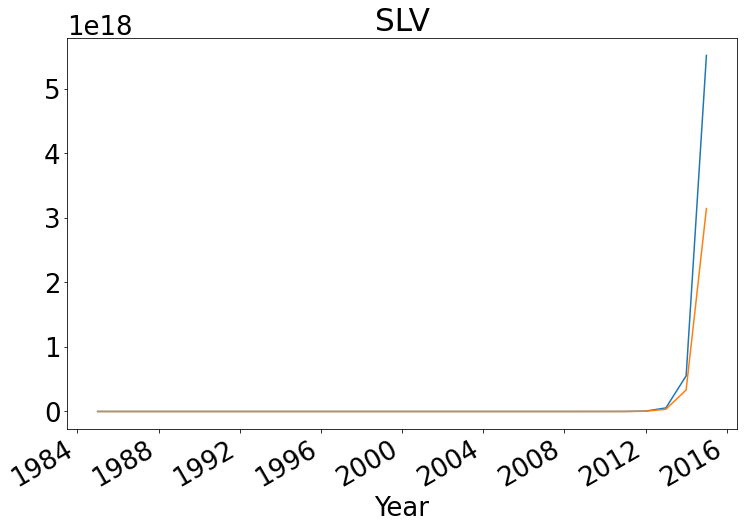

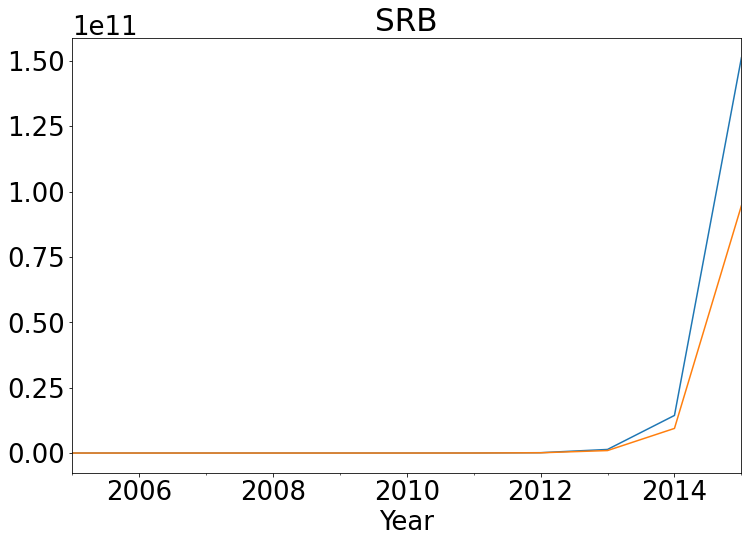

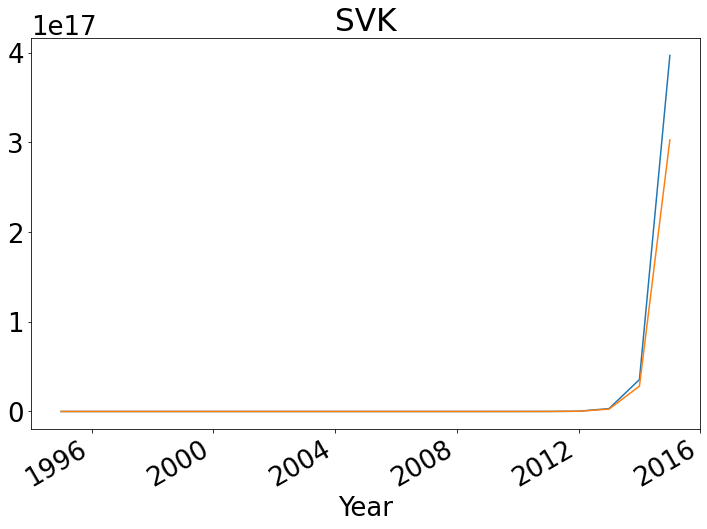

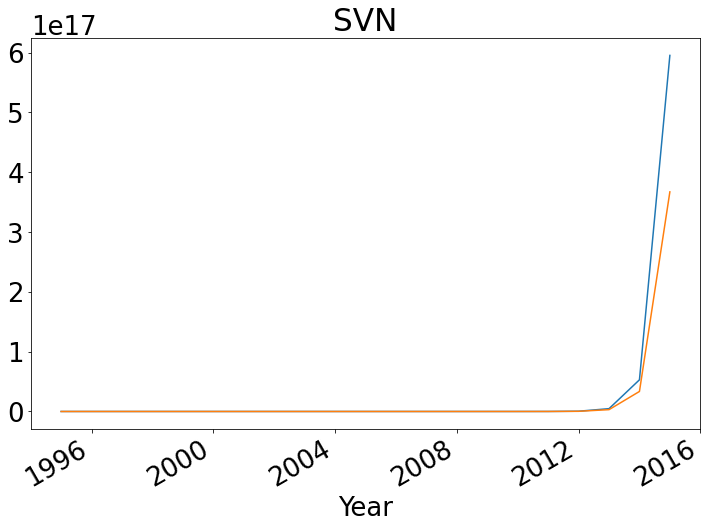

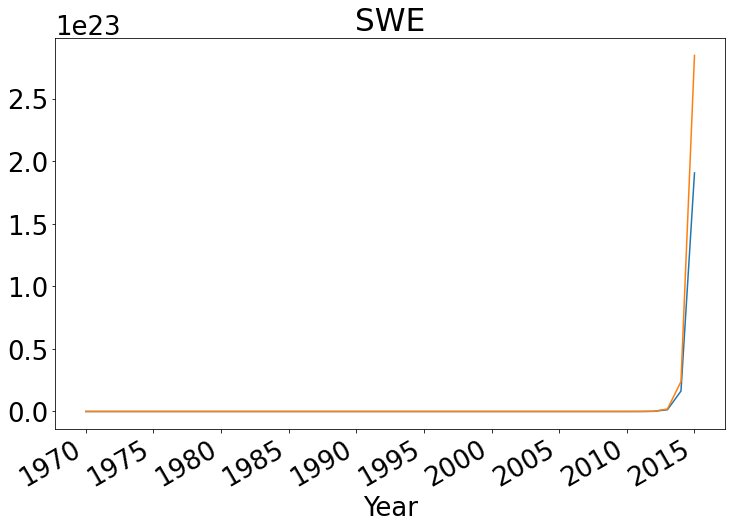

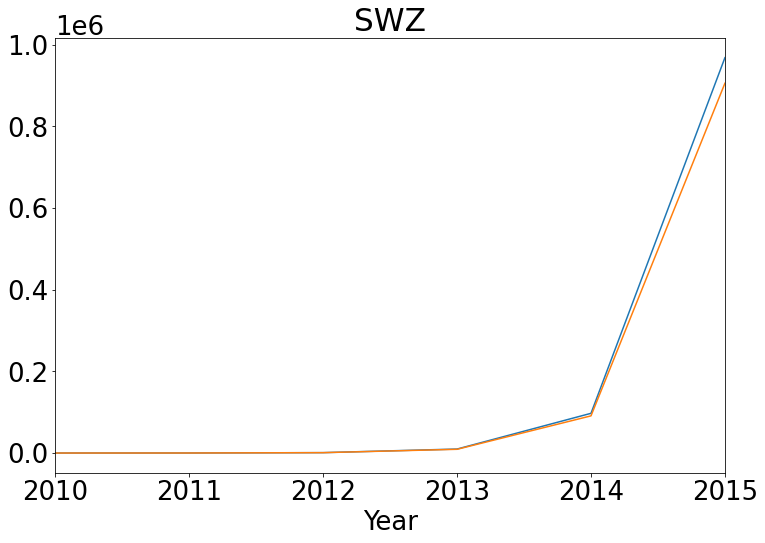

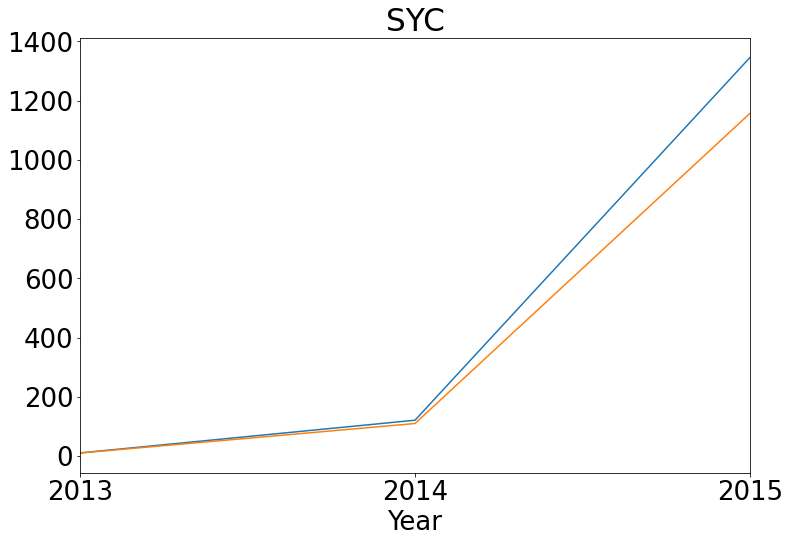

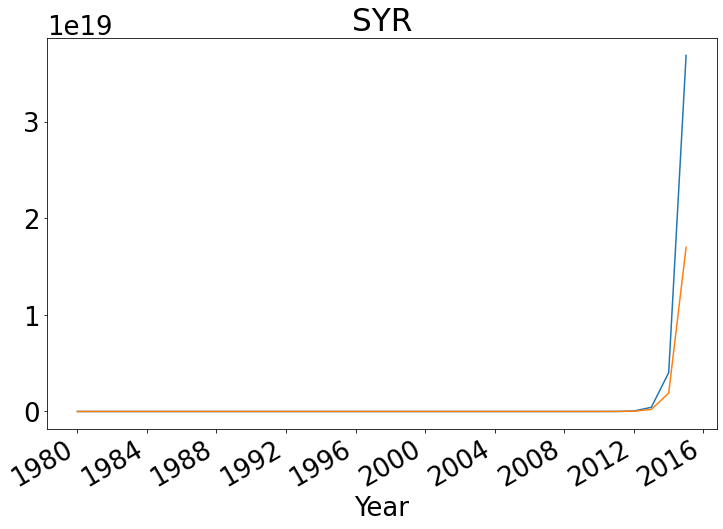

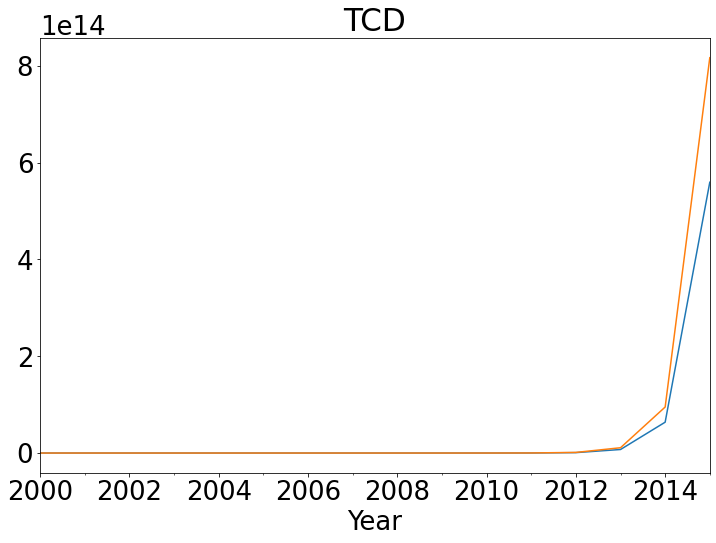

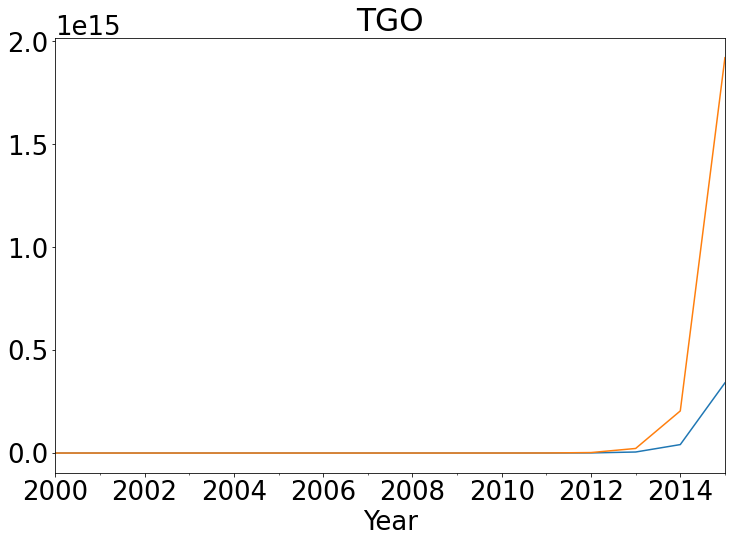

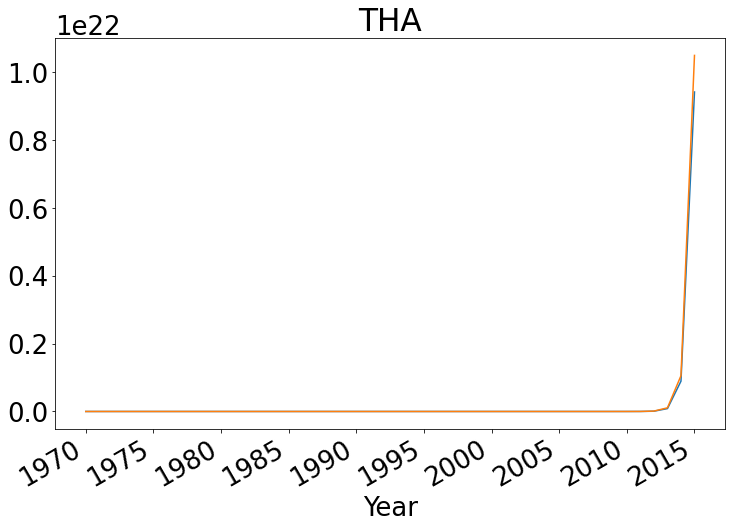

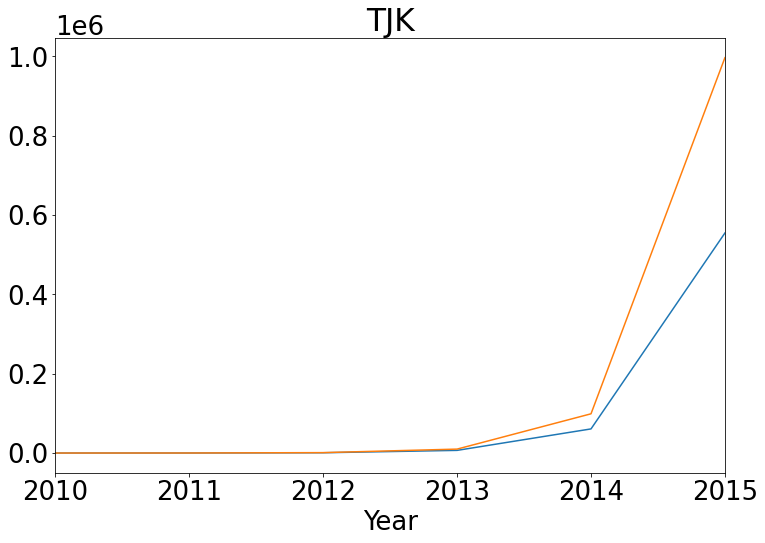

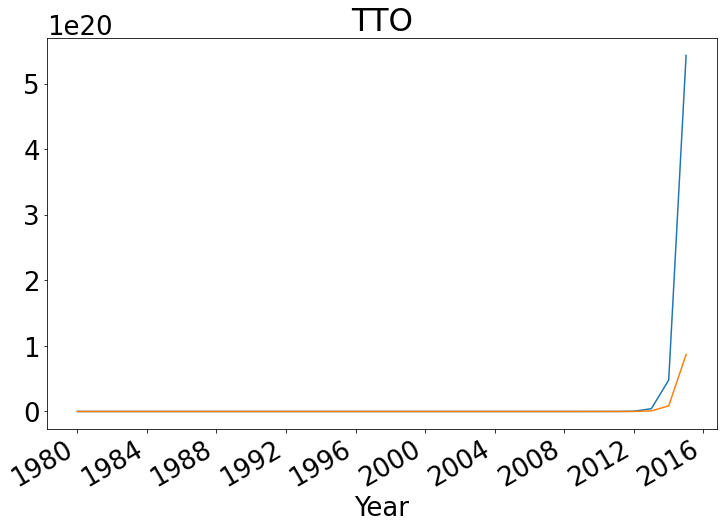

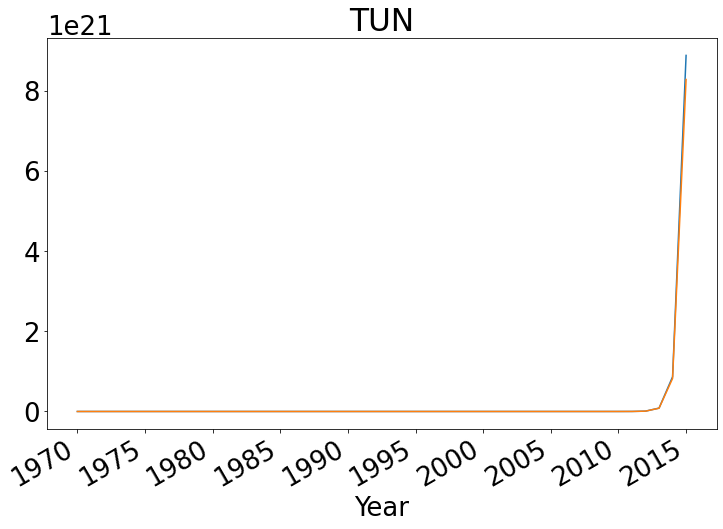

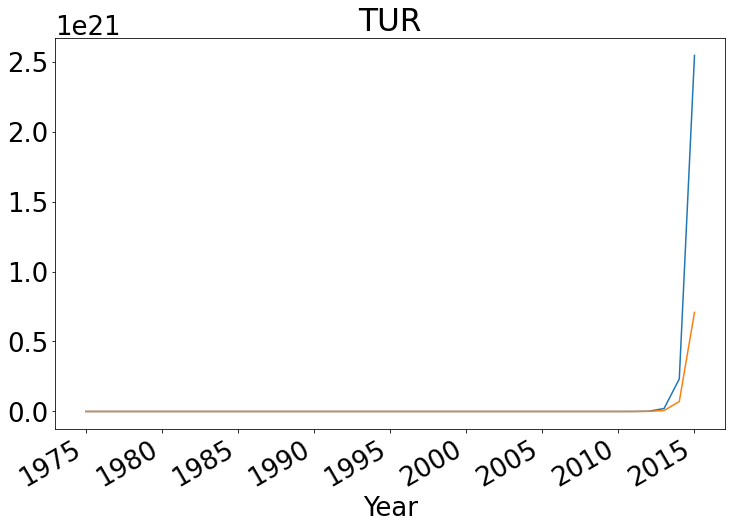

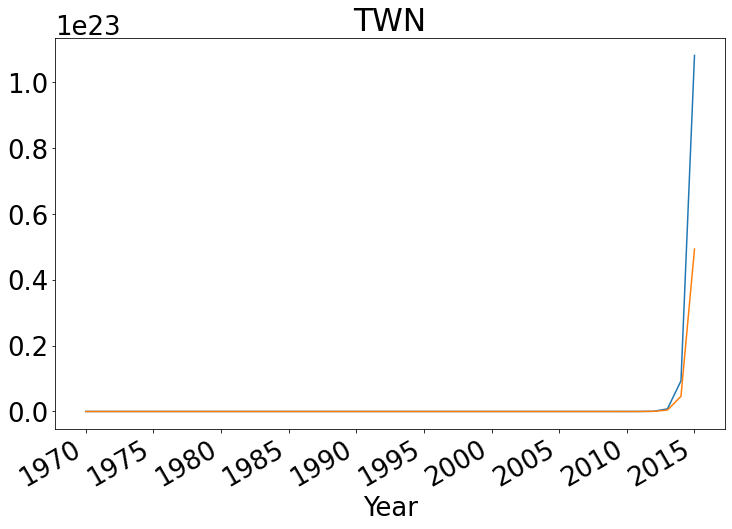

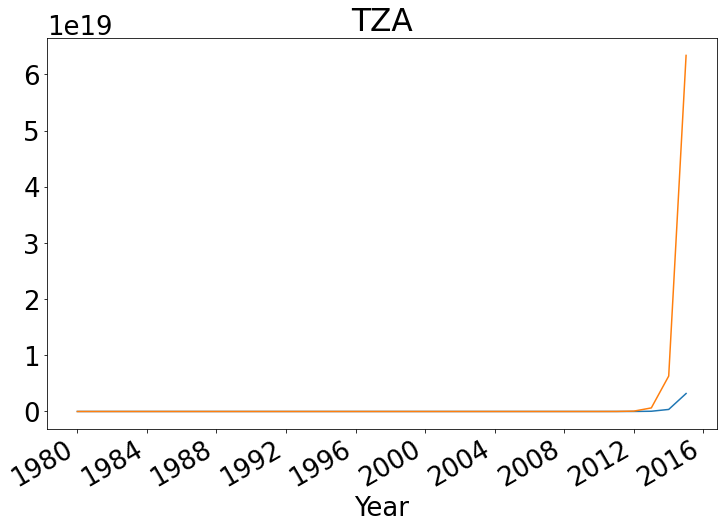

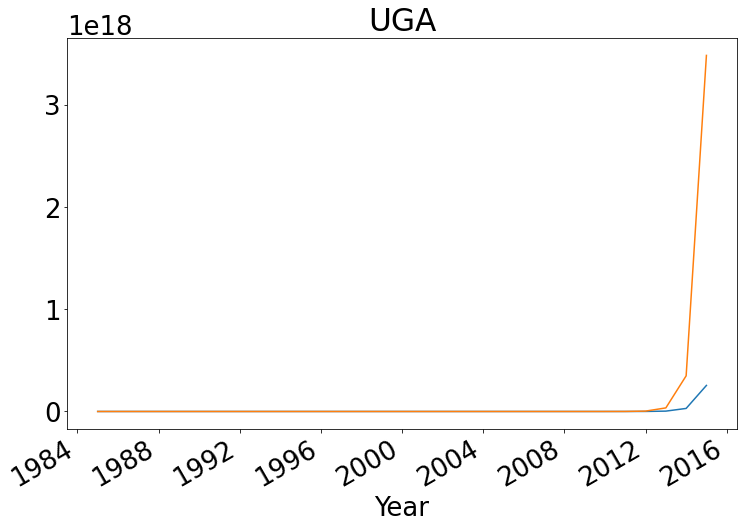

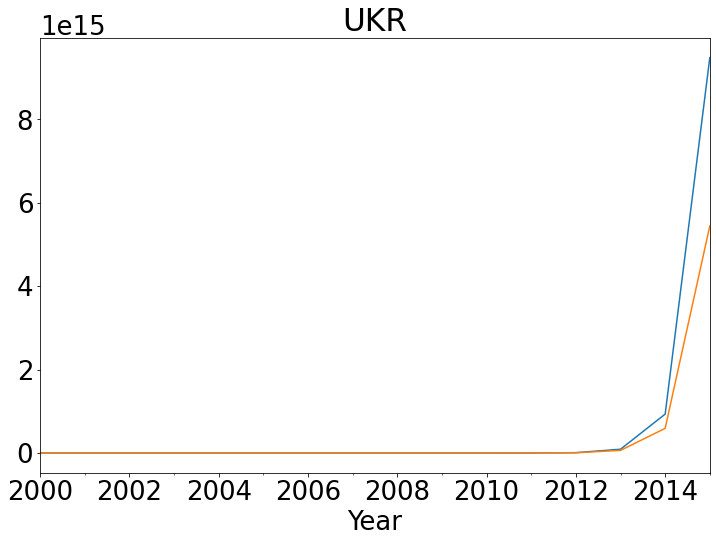

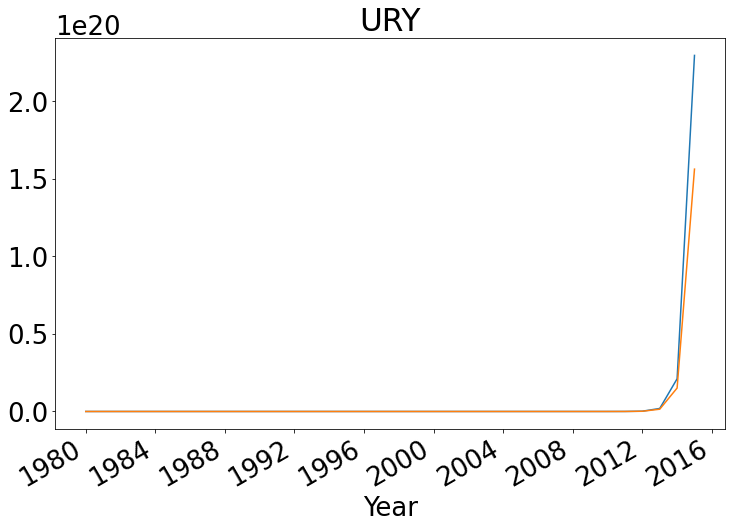

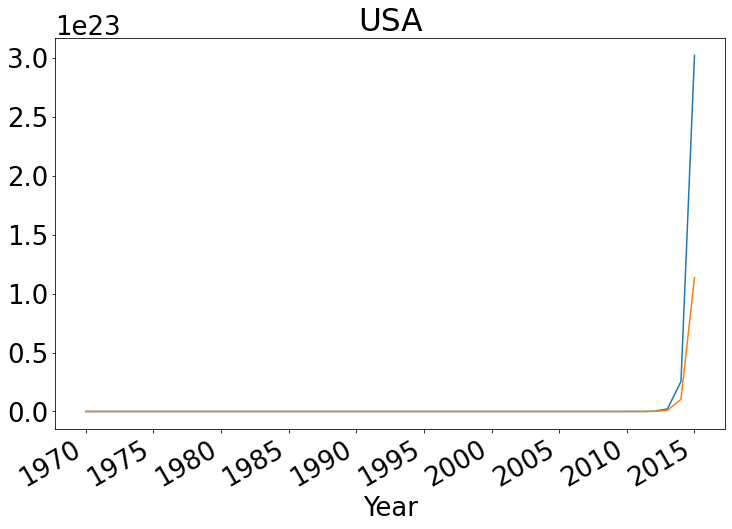

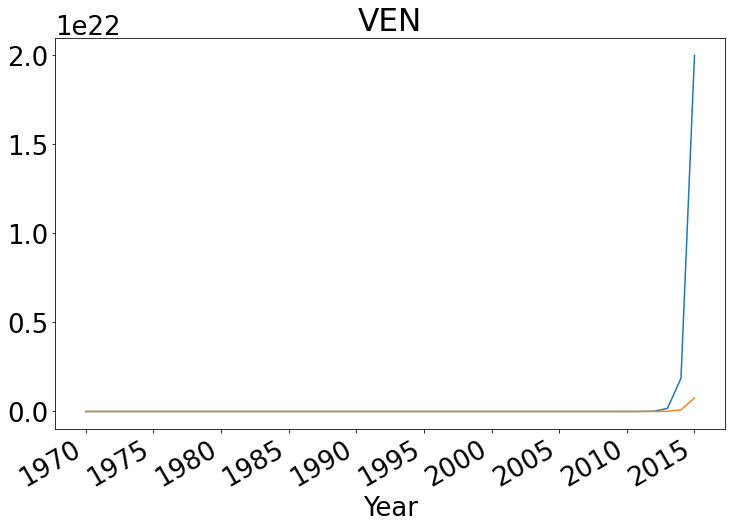

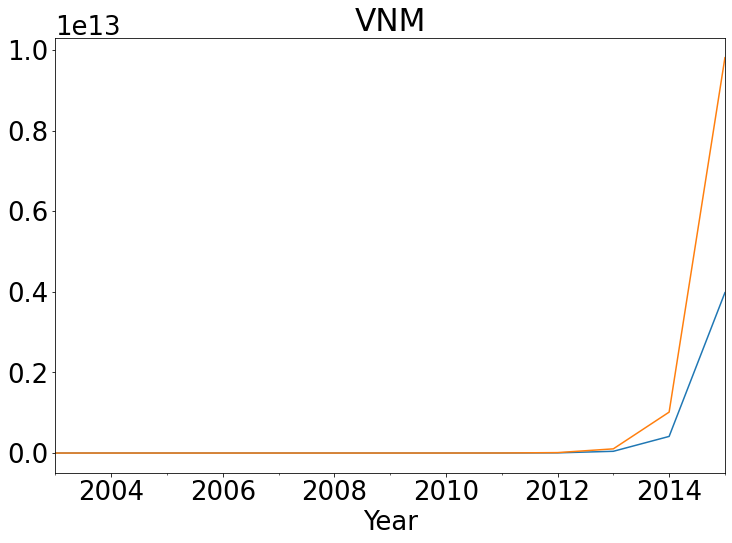

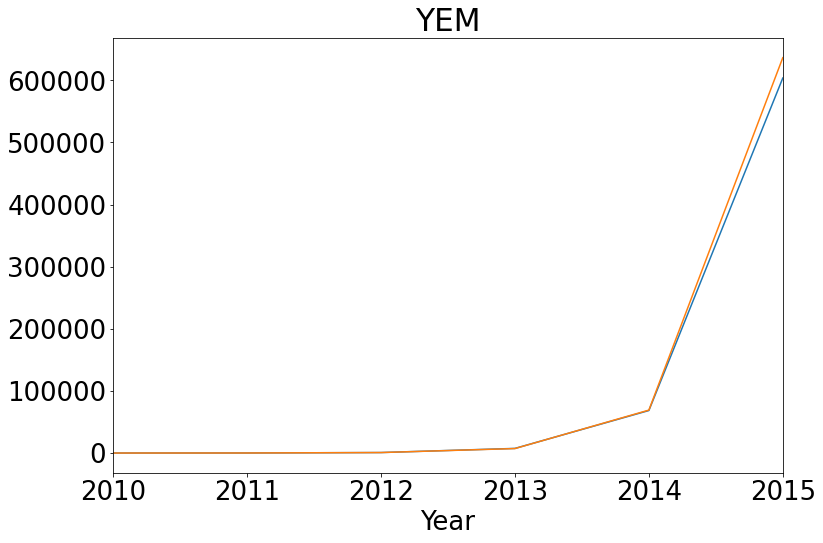

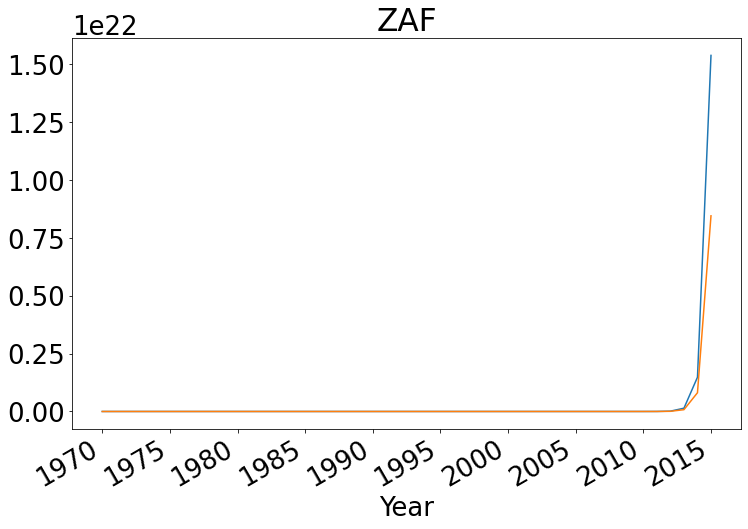

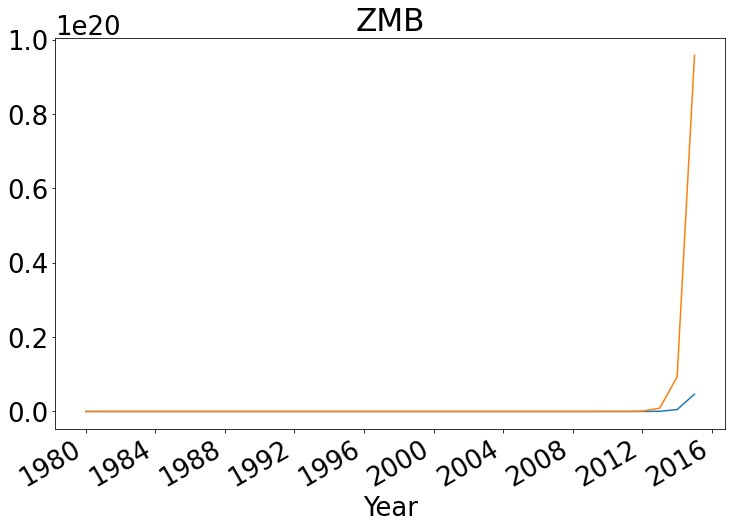

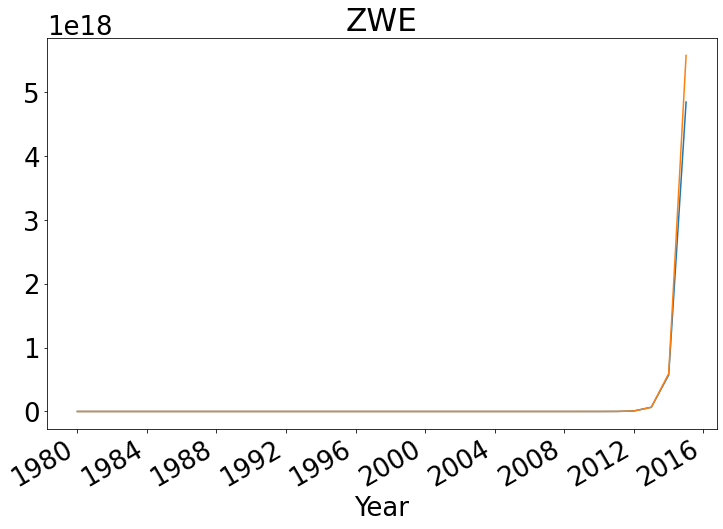

In [36]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["RGDP Per Capita Logged Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()

# Looking beautiful!